# ***Topic: Design and analysis of algorithms interactively searching for Top-K high-utility itemsets from uncertain databases.***

**Nhóm sinh viên thực hiện**
1. Huỳnh Hoàng Tiến Đạt - 52200023
2. Nguyễn Thị Huyền Diệu - 52200090
3. Bùi Đông Tấn Đạt - 52200001

***Mục lục***

>[Topic: Design and analysis of algorithms interactively searching for Top-K high-utility itemsets from uncertain databases.](#scrollTo=GkzsaNlN9lfK)

>[1. Import thư viện sử dụng](#scrollTo=Vo28MtDwcWVe)

>[2. Các Lớp Code và Thuật toán](#scrollTo=ifEf821KJl_Q)

>>[2.1 Các lớp hỗ trợ](#scrollTo=I4-G2khNJ7b3)

>>>[2.1.1 Tep.py](#scrollTo=p-I8EYf8JdCW)

>>>[2.1.2 Cup.py](#scrollTo=N0ROtOkDK7_m)

>>>[2.1.3 Node.py](#scrollTo=diIrJWrk0Ezj)

>>>[2.1.4 UHUFPTree.py](#scrollTo=sy_fzUtL0IdI)

>>>[2.1.5 TepITUFP.py](#scrollTo=DbJ6nGX_exqC)

>>>[2.1.6 CupITUFP.py](#scrollTo=CWiJszcOe1f2)

>>[2.2 Các Thuật toán ITUFP, TKU, TUHUFP, TUHUFP - Growth](#scrollTo=YwDjnUjMKI4r)

>>>[2.2.1 Thuật toán ITUFP](#scrollTo=XwOM7CzefAJ0)

>>>[2.2.2 Thuật toán TKU](#scrollTo=chX1FeIBfBhR)

>>>[2.2.3 Thuật toán TUHUFP](#scrollTo=R0yT_kTmfEK1)

>>>[2.2.4 Thuật toán TUHUFP - Growth](#scrollTo=5Raf2ZiCfGYB)

>>[2.3 Độ phức tạp của các thuật toán](#scrollTo=3yQ3xDl8BdGO)

>>>[2.3.1 Thuật toán ITUFP](#scrollTo=gCG_St5oBhnS)

>>>[2.3.2 Thuật toán TKU](#scrollTo=2gBxTYdqBkdJ)

>>>[2.3.3 Thuật toán TUHUFP](#scrollTo=FC_uXChyBoM7)

>>>[2.3.4 Thuật toán TUHUFP - Growth](#scrollTo=8MFLKKeOBrAC)

>[3. Hiện thực các thuật toán trên các bộ dữ liệu lớn](#scrollTo=m8z-OWVHfJ5X)

>>[3.1 Chạy với dữ liệu mẫu Example](#scrollTo=32w_hV8Z0YBM)

>>>[3.1.1 Thuật toán ITUFP](#scrollTo=w4A9CHEi2T9j)

>>>[3.1.2 Thuật toán TKU](#scrollTo=GqvjDrP82Tpi)

>>>[3.1.3 Thuật toán TUHUFP](#scrollTo=8E-OeIv32TWA)

>>>[3.1.4 Thuật toán TUHUFP - Growth](#scrollTo=MPVMwx7J2Qe_)

>>[3.2 Chạy với dữ liệu Foodmart](#scrollTo=qJV9MKtd0sJc)

>>>[3.2.1 Thuật toán ITUFP](#scrollTo=bIF9B4gK1yj6)

>>>[3.2.2 Thuật toán TKU](#scrollTo=rMFd1o2-15R8)

>>>[3.2.3 Thuật toán TUHUFP](#scrollTo=EuJWd29N2AF7)

>>>[3.2.4 Thuật toán TUHUFP - Growth](#scrollTo=MdUkpPsE2Fg1)

>>[3.3 Chạy với bộ Chess](#scrollTo=ZdB1M-wNCi_t)

>>>[3.3.1 Thuật toán ITUFP](#scrollTo=5IcAmeyW1u3E)

>>>[3.3.2 Thuật toán TKU](#scrollTo=dS7oujnMk-Yt)

>>>[3.3.3 Thuật toán TUHUFP](#scrollTo=vSWfkU1XzN2g)

>>>[3.3.4 Thuật toán TUHUFP - Growth](#scrollTo=JTXrzflazYdn)

>>[3.4 Chạy với bộ dữ liệu Retail](#scrollTo=1gilfUZAreSb)

>>>[3.4.1 Thuật toán ITUFP](#scrollTo=FUqXoCNernPb)

>>>[3.4.2 Thuật toán TKU](#scrollTo=3OC-UYTRwu-2)

>>>[3.4.3 Thuật toán TUHUFP](#scrollTo=ptC8lZ7RwxvF)

>>>[3.4.4 Thuật toán TUHUFP-Growth](#scrollTo=JMFuK3u0wz84)

>[4. Đồ thị thí nghiệm](#scrollTo=9kZXHmp6fMJq)

>>[4.1 Thời gian thực thi](#scrollTo=b3EPlcFM281Z)

>>>[4.1.1 Nhận xét về Runtime](#scrollTo=UeyAIEhd_86g)

>>[4.2 Bộ nhớ sử dụng](#scrollTo=7izpvDnQ3Agz)

>>>[4.2.1 Nhận xét về Memory Usage](#scrollTo=xk3xs-wRAC7f)

>[Tài liệu tham khảo](#scrollTo=84ft7fD3V06q)



# **1. Import thư viện sử dụng**

In [1]:
import os
import time
import sys
import random
import tracemalloc
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
from collections import defaultdict
from google.colab import drive

# **2. Các Lớp Code và Thuật toán**

## **2.1 Các lớp hỗ trợ**

### **2.1.1 Tep.py**

In [2]:
class Tep:
    """Là lớp đại diện cho thông tin của các giao dịch có trong bộ dữ liệu bao gồm mã giao dịch, xác suất, tiện ích và tiện ích giao dịch."""

    def __init__(person, TID : int, probability : float, utility : int, transaction_utility : int):
        """Bắt đầu khởi tạo đối tượng Tep.

        :param int TID: Mã giao dịch.
        :param float probability: Xác suất tồn tại của giao dịch.
        :param int utility: Giá trị tiện ích của giao dịch.
        :param int transaction_utility: Tiện ích giao dịch (tính toán dựa trên các yếu tố giao dịch).
        """

        """Ví dụ: tep1 = Tep(TID=101, probability=0.8567, utility=75, transaction_utility=120)
        -> Thông tin đối tượng Tep: Tep(TID=101, probability=0.86, utility=75, transaction_utility=120)
        """
        person.TID = TID
        person.probability = round(probability, 2)
        person.utility = utility
        person.transaction_utility = transaction_utility

    def combine_together(person, other_transaction) -> object:
        """Kết hợp hai đối tượng Tep lại với nhau để tạo ra một giao dịch mới.

        :param Tep other_transaction: Đối tượng giao dịch cần kết hợp.
        :returns: Một đối tượng `Tep` mới được tạo ra, được kết hợp từ hai đối tượng ban đầu.
        :rtype: Tep
        """

        """Ví dụ:
        tep1 = Tep(TID=1, probability=0.8, utility=50, transaction_utility=100)
        tep2 = Tep(TID=2, probability=0.6, utility=30, transaction_utility=80)
        -> Giao dịch được kết hợp: Tep(TID=1, probability=0.48, utility=80, transaction_utility=80)
        """
        combined_probability = round(person.probability * other_transaction.probability, 2)
        combined_utility = person.utility + other_transaction.utility
        return Tep(person.TID, combined_probability, combined_utility, other_transaction.transaction_utility)

    def __repr__(person):
        return f"Tep(TID={person.TID}, probability={person.probability}, utility={person.utility}, transaction_utility={person.transaction_utility})\n"

### **2.1.2 Cup.py**

In [3]:
class Cup:
    """Cup là đối tượng chứa các thông tin của một item bao gồm: tên, độ hỗ trợ mong đợi, danh sách Tep của item, giá trị xác suất lớn nhất trong Tep, TWU, giá trị tiện ích, phần tử cuối của item.
    """
    def __init__(person, name : str, transaction_information_list = None):
        """Khởi tạo Cup

        :param str name: Tên của item.
        :param List[Tep] transaction_information_list: Danh sách Tep của item. Nếu không được cung cấp, mặc định là None.
        """

        """Ví dụ:
        tep1 = Tep(TID=1, probability=0.7, utility=50, transaction_utility=100)
        tep2 = Tep(TID=2, probability=0.6, utility=30, transaction_utility=80)
        tep3 = Tep(TID=3, probability=0.8, utility=40, transaction_utility=90)

        transaction_list = [tep1, tep2, tep3]
        cup = Cup(name="ItemA", transaction_information_list=transaction_list)

        -> Thông tin đối tượng Cup: Cup(name=ItemA, exp_sup=2.1, max_probability=0.8, trans_wei_utility=270, utility=120, last=[])
        """
        person.name = name
        person.exp_sup = round(sum(transaction.probability for transaction in transaction_information_list), 2) if transaction_information_list else 0
        person.transaction_information_list = transaction_information_list if transaction_information_list else []
        person.max_probability = round(max(transaction.probability for transaction in transaction_information_list), 2) if transaction_information_list else 0
        person.trans_wei_utility = sum(transaction.transaction_utility for transaction in transaction_information_list) if transaction_information_list else 0
        person.utility = sum(transaction.utility for transaction in transaction_information_list) if transaction_information_list else 0
        person.last = []

    def update(person, probability : float, TID : int, transaction_utility : int, utility_value : int):
        """Cập nhật lại các giá trị có trong Cup

        :param float probability: Xác suất tồn tại của giao dịch.
        :param int TID: Mã giao dịch.
        :param int transaction_utility: Tiện ích giao dịch.
        :param int utility_value: Giá trị tiện ích.
        """

        """Ví dụ:
        Thông tin ban đầu của Cup: Cup(name=ItemA, exp_sup=0, max_probability=0, trans_wei_utility=0, utility=0, transaction_information_list=[])

        Thông tin sau lần cập nhật 1: Cup(name=ItemA, exp_sup=0.6, max_probability=0.6, trans_wei_utility=100, utility=50, transaction_information_list
        =[Tep(TID=1, probability=0.6, utility=50, transaction_utility=100)])

        Thông tin sau lần cập nhật 2: Cup(name=ItemA, exp_sup=1.4, max_probability=0.8, trans_wei_utility=250, utility=120, transaction_information_list
        =[Tep(TID=1, probability=0.6, utility=50, transaction_utility=100), Tep(TID=2, probability=0.8, utility=70, transaction_utility=150)])
        """
        probability = round(probability, 2)  # Làm tròn xác suất tới 2 chữ số thập phân
        transaction_information = Tep(TID, probability, utility_value, transaction_utility)
        person.exp_sup = round(person.exp_sup + probability, 2)  # Làm tròn sau khi thực hiện phép cộng
        person.utility += utility_value
        person.transaction_information_list.append(transaction_information)
        person.max_probability = max(person.max_probability, probability)
        person.trans_wei_utility += transaction_utility

    def combine_transaction_infomation(person, transaction_information_list_x, transaction_information_list_y) -> object:
        """Kết hợp hai danh sách Tep lại với nhau để tạo thành danh sách Tep mới

        :param list[Tep] transaction_information_list_x: Danh sách Tep của item X.
        :param list[Tep] transaction_information_list_y: Danh sách Tep của item Y.

        :return: Danh sách Tep của item XY.
        :rtype: list[Tep]
        """
        combined_list = []
        i, j = 0, 0
        while i < len(transaction_information_list_x) and j < len(transaction_information_list_y):
            tx = transaction_information_list_x[i]
            ty = transaction_information_list_y[j]
            if tx.TID < ty.TID:
                i += 1
            elif tx.TID > ty.TID:
                j += 1
            else:
                combined_probability = round(tx.probability * ty.probability, 2)  # Kết hợp xác suất lại với nhau
                combined_utility = tx.utility + ty.utility  # Kết hợp tiện ích lại
                combined_list.append(Tep(tx.TID, combined_probability, combined_utility, tx.transaction_utility))
                i += 1
                j += 1
        return combined_list

        """Ví dụ:
        list_x = [
            Tep(TID=1, probability=0.5, utility=30, transaction_utility=100),
            Tep(TID=2, probability=0.6, utility=40, transaction_utility=150),
            Tep(TID=4, probability=0.7, utility=50, transaction_utility=200),
        ]

        list_y = [
            Tep(TID=2, probability=0.8, utility=35, transaction_utility=120),
            Tep(TID=3, probability=0.9, utility=45, transaction_utility=130),
            Tep(TID=4, probability=0.6, utility=50, transaction_utility=140),
        ]
        Danh sách Tep sau khi kết hợp:
        Tep(TID=2, probability=0.48, utility=75, transaction_utility=150)
        Tep(TID=4, probability=0.42, utility=100, transaction_utility=200)
        """

    def combine_together(person, other_information_item) -> object:
        """Kết hợp hai Cup lại với nhau.

        :param Cup other_information_item: Cup tham gia kết hợp.

        :return: Một Cup mới được tạo ra.
        :rtype: Cup
        """

        """Ví dụ:
        Tên của Cup mới: Item A, Item B
        Danh sách Tep sau khi kết hợp:
        Tep(TID=2, probability=0.56, utility=75, transaction_utility=150)
        """
        if len(other_information_item.last) == 0:
            combined_name = person.name + ', ' + other_information_item.name
            combined_transaction_information_list = person.combine_transaction_infomation(person.transaction_information_list, other_information_item.transaction_information_list)
            last = [other_information_item]
        else:
            combined_name = person.name + ', ' + other_information_item.last[0].name
            combined_transaction_information_list = person.combine_transaction_infomation(person.transaction_information_list, other_information_item.last[0].transaction_information_list)
            last = other_information_item.last

        combined_information_item = Cup(combined_name, combined_transaction_information_list)
        combined_information_item.last = last
        return combined_information_item

    def __repr__(person):
        return f"Cup(name={person.name}, exp_sup={person.exp_sup}, utility={person.utility})"

### **2.1.3 Node.py**

In [ ]:
class Node:
    """Đại diện cho một nút trong cây `HighUtilityUncertainTree`, nơi lưu trữ thông tin về mục, xác suất, số lượng xuất hiện, tiện ích, và các nút con."""
    def __init__(person, item=None, probability = 0.0, count = 0, utility=0, eu=0):
        """
        Khởi tạo một nút mới.

        :param str item: Tên của mục liên kết với nút. Mặc định là None nếu nút không đại diện cho mục nào.
        :param float probability: Xác suất xuất hiện của mục. Mặc định là 0.0.
        :param int count: Số lượng (hỗ trợ) của nút này trong các giao dịch. Mặc định là 0.
        :param int utility: Giá trị tiện ích của mục tại nút này. Mặc định là 0.
        :param int eu: Tiện ích ước tính (Estimated Utility) của nút. Mặc định là 0.
        :param dict children: Từ điển chứa các nút con, với khóa là một tuple (item, probability, utility) và giá trị là nút tương ứng.
        :param Node parent: Tham chiếu đến nút cha. Mặc định là None nếu nút là gốc.
        """
        person.item = item
        person.probability = probability
        person.count = count
        person.utility = utility
        person.eu = eu
        person.children = {}
        person.parent = None

### **2.1.4 UHUFPTree.py**

In [4]:
class UHUFPTree:
    """Lớp đại diện cho cây UHUFP (Cây mẫu tần suất tiện ích cao không chắc chắn).

    :param Node root: Gốc của cây, là một đối tượng Node.
    :param defaultdict header_table: Bảng tiêu đề, lưu trữ các liên kết đến các nút với cùng một mục.
    """
    def __init__(person):
        """
        Khởi tạo cây UHUFP với gốc là một nút rỗng và bảng tiêu đề là một defaultdict.
        """
        person.root = Node()
        person.header_table = defaultdict(list)

    def insert_reorganization_transaction(person, transaction : dict, utilities : dict, sorted_items : list):
        """Chèn một giao dịch đã được tổ chức lại vào cây UHUFP.

        :param dict transaction: Giao dịch với các mục và xác suất tương ứng.
        :param dict utilities: Bảng tiện ích của các mục trong giao dịch.
        :param list sorted_items: Danh sách các mục được sắp xếp theo thứ tự TWU giảm dần.
        """

        """Ví dụ:
        Node(item=None, probability=0.0, count=0, utility=0, eu=0)
          Node(item=A, probability=0.8, count=1, utility=50, eu=100)
            Node(item=B, probability=0.7, count=1, utility=30, eu=70)
              Node(item=C, probability=0.6, count=1, utility=20, eu=20)
        """
        current_node = person.root
        rtu = sum(utilities.values())  # Tổng tiện ích của giao dịch

        for i, item in enumerate(sorted_items):
            item_probability = transaction[item]
            item_utility = utilities[item]

            if (item, item_probability, item_utility) in current_node.children:
                child_node = current_node.children[(item, item_probability, item_utility)]
                child_node.count += 1
                items_after_sorted = sorted_items[i+1:]
                remaining_utility = sum(utilities.get(it, 0) for it in items_after_sorted)
                child_node.eu += rtu - remaining_utility
            else:
                child_node = Node(item=item, probability=item_probability, count=1, utility=item_utility)
                items_after_sorted = sorted_items[i+1:]
                remaining_utility = sum(utilities.get(it, 0) for it in items_after_sorted)
                child_node.eu = rtu - remaining_utility

                child_node.parent = current_node
                current_node.children[(item, item_probability, item_utility)] = child_node
                person.header_table[item].append(child_node)

            current_node = child_node

    def insert_reorganization_path(person, transaction : dict, utilities : dict, sorted_items : list, miu : dict):
        """Chèn một đường dẫn đã được tổ chức lại vào cây UHUFP. (chiến lược 8)

        :param dict transaction: Giao dịch với các mục và xác suất tương ứng.
        :param dict utilities: Bảng tiện ích của các mục trong giao dịch.
        :param list sorted_items: Danh sách các mục được sắp xếp theo thứ tự tiện ích đường dẫn của item trong CPB giảm dần.
        :param dict miu: Bảng tiện ích mục nhỏ nhất cho mỗi mục trong đường dẫn.
        """
        current_node = person.root
        for i, item in enumerate(sorted_items):
            item_probability = transaction[item]
            item_utility = utilities[item]

            if (item, item_probability, item_utility) in current_node.children:
                child_node = current_node.children[(item, item_probability, item_utility)]
                child_node.count += 1
                utilities_after = sum(miu.get(x, 0) * child_node.count for x in list(sorted_items.keys())[i + 1:])
                child_node.eu += sorted_items[item] - utilities_after
            else:
                child_node = Node(item=item, probability=item_probability, count=1, utility=item_utility)
                utilities_after = sum(miu.get(x, 0) * child_node.count for x in list(sorted_items.keys())[i + 1:])
                child_node.eu = sorted_items[item] - utilities_after

                child_node.parent = current_node
                current_node.children[(item, item_probability, item_utility)] = child_node
                person.header_table[item].append(child_node)

            current_node = child_node

    def print_header_UHUFPTree_table(person):
        """
        In bảng tiêu đề (header table) của cây UHUFP.
        """
        print("\nHeader UHUFP Tree Table:")
        for item, nodes in person.header_table.items():
            for node in nodes:
                print(f"  -> Node: Item={node.item}, Support={node.probability}, Count={node.count}, Utility={node.utility}")
        print("Kết thúc Header UHUFP Tree Table\n")

    def print_UHUFPtree(person):
        """
        In cấu trúc của cây UHUFP.
        """
        def print_node(node, level=0):
            index = ' ' * (level * 4)
            print(f"{index}Item: {node.item}, Support: {node.probability}, Count: {node.count}, Utility: {node.utility}, eu: {node.eu}")
            for child in node.children.values():
                print_node(child, level + 1)

        print("UHUFP Tree:")
        print_node(person.root)
        print("Kết thúc UHUFP Tree")

    def prune_patterns_uns(person, k : int, items_twu : dict, mieUtil : int):
        """Cắt bớt các mẫu không cần thiết dựa trên TWU và số lượng top-k.

        :param int k: Số lượng các mục top-k cần giữ lại.
        :param dict items_twu: Bảng TWU của các mục.
        :param int mieUtil: Ngưỡng tiện ích.
        """

        """Ví dụ:
        Trước khi cắt
        A: ['prob=0.8, count=5', 'prob=0.9, count=3']
        B: ['prob=0.7, count=4']
        C: ['prob=0.6, count=2']
        D: ['prob=0.5, count=6']

        Sau khi cắt
        A: ['prob=0.8, count=5', 'prob=0.9, count=3']
        B: ['prob=0.7, count=4']
        """
        item_expericence_sups = {}
        for item, nodes in person.header_table.items():
            experience_sup = sum(node.prob * node.count for node in nodes)
            item_expericence_sups[item] = experience_sup
        # Sắp xếp theo expSup của item
        sorted_items_by_experience_sup = sorted(person.header_table.keys(), key=lambda item: item_expericence_sups[item], reverse=True)
        person.header_table = {item: person.header_table[item] for item in sorted_items_by_experience_sup}

        filtered_header_UHUFPTree_table = defaultdict(list)
        for item, nodes in person.header_table.items():
            k -= 1
            twu = items_twu[item]
            if twu >= mieUtil:
                filtered_header_UHUFPTree_table[item] = person.header_table[item]
            if k <= 0:
                break
        person.header_table = filtered_header_UHUFPTree_table

    def prune_UHUFPtree(person, node): #Cắt tỉa
        """Loại bỏ các nút khỏi cây nếu mục của chúng không có trong bảng tiêu đề.

        :param Node node: Nút hiện tại đang xử lý để cắt tỉa.
        """

        """Ví dụ:
        Trước khi cắt tỉa:
        Item: None, Prob: 0.0, Count: 0
          Item: A, Prob: 0.8, Count: 3
            Item: D, Prob: 0.9, Count: 4
            Item: E, Prob: 0.5, Count: 3
          Item: B, Prob: 0.7, Count: 5
            Item: F, Prob: 0.4, Count: 2
          Item: C, Prob: 0.6, Count: 2

          Sau khi cắt tỉa:
          Item: None, Prob: 0.0, Count: 0
            Item: A, Prob: 0.8, Count: 3
              Item: E, Prob: 0.5, Count: 3
            Item: B, Prob: 0.7, Count: 5
        """
        items_to_keep = set(person.header_table.keys())
        children_to_keep = {k: v for k, v in node.children.items() if v.item in items_to_keep}

        node.children = children_to_keep

        for child in node.children.values():
            person.prune_tree(child)

### **2.1.5 TepITUFP.py**

In [5]:
class TepITUFP:
    """Là lớp đại diện cho các thông tin của một giao dịch, bao gồm mã giao dịch, xác suất, tiện ích và tiện ích giao dịch."""

    def __init__(person, TID : int, probability : float, util : int, transaction_utility : int):
        """Khởi tạo một đối tượng TepITUFP.

        :param int TID: Mã giao dịch.
        :param float probability: Xác suất tồn tại của giao dịch.
        :param int util: Giá trị tiện ích của giao dịch.
        :param int transaction_utility: Tiện ích giao dịch (tính toán dựa trên các yếu tố giao dịch).
        """
        person.TID = TID
        person.probability = round(probability, 2)
        person.util = util
        person.transaction_utility = transaction_utility

    def combine_together(person, other_transaction) -> object:
        """Kết hợp hai đối tượng TepITUFP lại với nhau để tạo ra một giao dịch mới.

        :param TepITUFP other_transaction: Đối tượng giao dịch cần kết hợp.
        :return TepITUFP: Một đối tượng TepITUFP mới, được kết hợp từ hai đối tượng ban đầu.
        """

        """Ví dụ:
        Giao dịch kết hợp: TID = 101, Xác suất = 0.56, Tiện ích = 35, Tiện ích giao dịch = 12
        """
        combined_probability = round(person.probability * other_transaction.probability, 2)
        combined_util = person.util + other_transaction.util
        return TepITUFP(person.TID, combined_probability, combined_util, other_transaction.transaction_utility)

    def __repr__(person):
        """Định dạng in ra thông tin của giao dịch."""
        return f"TepITUFP(TID={person.TID}, probability={person.probability}, util={person.util}, transaction_utility={person.transaction_utility})\n"

### **2.1.6 CupITUFP.py**

In [ ]:
class CupITUFP:
    """
    CupITUFP là đối tượng chứa các thông tin liên quan đến một item, bao gồm: tên, danh sách giao dịch, tiện ích giao dịch, tiện ích tổng, và các thuộc tính hỗ trợ khác.
    """
    def __init__(person, name : str, transaction_information_list=None):
        """Khởi tạo đối tượng CupITUFP.

        :param str name: Tên của item.
        :param List[TepITUFP] transaction_information_list: (Tùy chọn) Danh sách thông tin giao dịch của item.
        """
        person.name = name
        person.transaction_information_list = transaction_information_list if transaction_information_list else []
        person.exp_sup = round(sum(transaction.probability for transaction in person.transaction_information_list), 2) if person.transaction_information_list else 0
        person.utility = sum(transaction.util for transaction in person.transaction_information_list) if person.transaction_information_list else 0
        person.trans_wei_utility = sum(transaction.transaction_utility for transaction in person.transaction_information_list) if person.transaction_information_list else 0
        person.max_probability = round(max(transaction.probability for transaction in person.transaction_information_list), 2) if person.transaction_information_list else 0

    def update(person, probability : float, TID : int, transaction_utility : int, util_value : int):
        """Cập nhật thông tin giao dịch cho CupITUFP.

        :param float probability: Xác suất của giao dịch.
        :param int TID: Mã giao dịch.
        :param int transaction_utility: Tiện ích giao dịch.
        :param int util_value: Giá trị tiện ích.
        """
        probability = round(probability, 2)
        transaction_information = TepITUFP(TID, probability, util_value, transaction_utility)
        person.transaction_information_list.append(transaction_information)
        person.exp_sup = round(person.exp_sup + probability, 2)
        person.utility += util_value
        person.trans_wei_utility += transaction_utility
        person.max_probability = max(person.max_probability, probability)

    def combine_transaction_infomation(person, transaction_information_list_x, transaction_information_list_y) -> object:
        """Kết hợp hai danh sách giao dịch lại với nhau.

        :param List[TepITUFP] transaction_information_list_x: Danh sách giao dịch X.
        :param List[TepITUFP] transaction_information_list_y: Danh sách giao dịch Y.
        :return: Danh sách giao dịch kết hợp.
        :rtype: List[TepITUFP]
        """
        combined_list = []
        i, j = 0, 0
        while i < len(transaction_information_list_x) and j < len(transaction_information_list_y):
            tx = transaction_information_list_x[i]
            ty = transaction_information_list_y[j]
            if tx.TID < ty.TID:
                i += 1
            elif tx.TID > ty.TID:
                j += 1
            else:
                combined_probability = round(tx.probability * ty.probability, 2)
                combined_util = tx.util + ty.util
                combined_list.append(TepITUFP(tx.TID, combined_probability, combined_util, tx.transaction_utility))
                i += 1
                j += 1
        return combined_list

    def combine_together(person, other_CupITUFP) -> object:
        """Kết hợp hai đối tượng CupITUFP lại với nhau.

        :param CupITUFP other_CupITUFP: Đối tượng CupITUFP khác cần kết hợp.
        :return: Một đối tượng CupITUFP mới được tạo ra từ việc kết hợp.
        :rtype: CupITUFP
        """
        combined_name = f"{person.name}, {other_CupITUFP.name}"
        combined_transaction_information_list = person.combine_transaction_infomation(person.transaction_information_list, other_CupITUFP.transaction_information_list)
        return CupITUFP(combined_name, combined_transaction_information_list)

    def __repr__(person):
        return f"CupITUFP(name={person.name}, exp_sup={person.exp_sup}, utility={person.utility})"

## **2.2 Các Thuật toán ITUFP, TKU, TUHUFP, TUHUFP - Growth**

### **2.2.1 Thuật toán ITUFP**

In [6]:
class ITUFPAlgorithm:
    """Thuật toán tương tác tìm kiếm các mẫu phổ biến có tiện ích cao (Top-K HUF Patterns).

    ITUFP sử dụng các bước sau:
    1. Đọc và xử lý dữ liệu đầu vào.
    2. Tạo các đối tượng CupITUFP từ dữ liệu.
    3. Kết hợp các CupITUFP và tìm kiếm các mẫu có tiện ích cao.
    4. Lưu trữ và xuất kết quả với các mẫu top-K có tiện ích cao nhất.
    """

    def __init__(person):
        """Khởi tạo các tham số cho thuật toán."""
        person.start_timeskip = 0
        person.end_timeskip = 0
        person.database_size = 0
        person.database_util = 0
        person.candidates = 0
        person.top_patterns = []
        person.single_infoitem = {}
        person.threshold = float('-inf')
        person.min_util = float('-inf')
        person.peak_memory_usage = 0

    def read_data(person, file_path : str, percentage : float, k : int):
        """Đọc dữ liệu từ các file đầu vào và khởi tạo các tham số cần thiết.

        :param str file_path: Đường dẫn tới các file cơ sở dữ liệu.
        :param float percentage: Ngưỡng tiện ích (%).
        :param int k: Số lượng mẫu cần tìm.
        """
        file_paths = file_path.split(", ")
        try:
            with open(file_paths[0], 'r') as file1, open(file_paths[1], 'r') as file2:
                print("Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .")
                tlines = file1.readlines()
                ulines = file2.readlines()
                item_name = tlines[0].strip().split(" ")

                TID = 1
                for prob_line, util_line in zip(tlines[1:], ulines):
                    person.process_data(item_name, prob_line.strip(), util_line.strip(), TID)
                    TID += 1
                    person.database_size += 1

                person.min_util = int(person.database_util * percentage)
                print(f"Ngưỡng tiện ích được thiết lập là: {person.min_util}")
        except FileNotFoundError as e:
            print(f"Không tìm thấy File: {e}")
            print("Thuật toán kết thúc. Tạm biệt !")
            sys.exit(0)
        except Exception as e:
            print(f"Đã xảy ra lỗi: {e}")
            sys.exit(0)

    def process_data(person, item_name : list, prob_line : str, util_line : str, TID : int):
        """Xử lý dữ liệu từ các dòng cơ sở dữ liệu và tạo ra các đối tượng CupITUFP.

        :param List[str] item_name: Danh sách các tên item.
        :param str prob_line: Dòng dữ liệu xác suất của các item.
        :param str util_line: Dòng dữ liệu tiện ích của các item.
        :param int TID: Mã giao dịch.
        """
        probability_list = prob_line.split(" ")
        trans = util_line.split(":")
        items_util = trans[0].split(" ")
        transaction_util = int(trans[1])
        util_list = trans[2].split(" ")

        item_util_list = {item: int(util) for item, util in zip(items_util, util_list)}

        person.database_util += transaction_util

        for i, probability in enumerate(probability_list):
            probability = probability.strip()
            if probability and float(probability) > 0:
                try:
                    item = item_name[i]
                    probability = round(float(probability), 2)
                    utility_value = item_util_list[item]
                    info_item_name = item

                    # Kiểm tra nếu InfoItem đã được tạo chưa, nếu chưa thì tạo mới
                    if info_item_name in person.single_infoitem:
                        person.single_infoitem[info_item_name].update(probability, TID, transaction_util, utility_value)
                    else:
                        new_transaction_information = TepITUFP(TID, probability, utility_value, transaction_util)
                        person.single_infoitem[info_item_name] = CupITUFP(info_item_name, [new_transaction_information])
                except ValueError as ve:
                    print(f"Lỗi khi xử lý xác suất '{probability}': {ve}")
                    continue

    def combine_CupITUFP(person, infoitemX, infoitemY) -> object:
        """Kết hợp hai đối tượng CupITUFP thành một đối tượng mới.

        :param CupITUFP infoitemX: Đối tượng CupITUFP thứ nhất.
        :param CupITUFP infoitemY: Đối tượng CupITUFP thứ hai.
        :return: Đối tượng CupITUFP kết hợp.
        :rtype: CupITUFP
        """
        combined_infoitem = infoitemX.combine_together(infoitemY)
        combined_infoitem.exp_sup = round(combined_infoitem.exp_sup, 2)
        return combined_infoitem

        """Ví dụ:
        infoitemX = CupITUFP(name="Item X", exp_sup=0.8, transaction_information_list=transaction_info_1)
        infoitemY = CupITUFP(name="Item Y", exp_sup=1.2, transaction_information_list=transaction_info_2)

        Đối tượng kết hợp: Item X, Item Y
        ExpSup kết hợp: 2.0
        Thông tin giao dịch kết hợp: ['Tep1', 'Tep2', 'Tep3', 'Tep4']
        """

    def get_top_k_patterns(person, min_util: int, k: int) -> object:
        """Lấy danh sách các ứng viên top-k từ danh sách CupITUFP đã xử lý.

        :param int min_util: Ngưỡng tiện ích.
        :param int k: Số lượng mẫu top-k cần tìm.
        :return: Danh sách các ứng viên.
        :rtype: List[CupITUFP]
        """
        candidate_list = []
        CupITUFP = sorted(person.single_infoitem.values(), key=lambda x: x.exp_sup, reverse=True)

        for infoitem in CupITUFP[:k]:
            if infoitem.utility >= min_util:
                candidate_list.append(infoitem)
                person.top_patterns.append({'name': infoitem.name, 'exp_sup': infoitem.exp_sup, 'utility': infoitem.utility})

        return candidate_list

        """Ví dụ:
        Name: Item D, ExpSup: 0.95, Utility: 200
        Name: Item B, ExpSup: 0.85, Utility: 150

        Top Patterns Stored:
        {'name': 'Item D', 'exp_sup': 0.95, 'utility': 200}
        {'name': 'Item B', 'exp_sup': 0.85, 'utility': 150}
        """

    def interactive_search(person, currentCupITUFP: list, k: int):
        """Thuật toán tìm kiếm tương tác các mẫu Top-K.

        :param List[CupITUFP] currentCupITUFP: Danh sách các ứng viên.
        :param int k: Số lượng mẫu top-k cần tìm.
        """

        """Ví dụ:
        Top Patterns Stored:
        Name: Item A + Item B, ExpSup: 0.8, Utility: 270
        Name: Item D, ExpSup: 0.95, Utility: 200
        Name: Item B + Item C, ExpSup: 0.875, Utility: 230
        """
        if len(currentCupITUFP) <= 1:
            return

        for i in range(len(currentCupITUFP) - 1):
            newCupITUFPList = []
            for j in range(i + 1, len(currentCupITUFP)):
                overestimate = currentCupITUFP[i].exp_sup * currentCupITUFP[j].max_probability
                if overestimate < person.threshold:
                    break
                combined = person.combine_CupITUFP(currentCupITUFP[i], currentCupITUFP[j])
                if combined and combined.exp_sup > person.threshold:
                    person.update_top_k(combined, k)
                    if combined.trans_wei_utility >= person.min_util:
                        newCupITUFPList.append(combined)
                        person.candidates += 1
            # Tiến hành tìm kiếm tương tác trên danh sách mới
            if newCupITUFPList:  # Chỉ gọi lại nếu có kết quả mới
                person.interactive_search(newCupITUFPList, k)

    def update_top_k(person, combined, k: int):
        """Cập nhật danh sách Top-K với mẫu kết hợp.

        :param CupITUFP combined: Mẫu kết hợp.
        :param int k: Số lượng mẫu top-k cần tìm.
        """
        if combined.utility >= person.min_util:
            # Kiểm tra sự trùng lặp trước khi thêm vào
            if combined.name not in [x['name'] for x in person.top_patterns]:
                person.top_patterns.append({'name': combined.name, 'exp_sup': combined.exp_sup, 'utility': combined.utility})
                person.top_patterns.sort(key=lambda x: x['exp_sup'], reverse=True)
                if len(person.top_patterns) > k:
                    person.top_patterns = person.top_patterns[:k]
                    person.threshold = person.top_patterns[-1]['exp_sup']
                if len(person.top_patterns) == k:
                    person.threshold = person.top_patterns[-1]['exp_sup']

    def run_ITUFP_algorithm(person, file_path: str, percentage: float, k: int):
        """Chạy thuật toán ITUFP để tìm kiếm các mẫu top-k có tiện ích cao.

        :param str file_path: Đường dẫn tới các file cơ sở dữ liệu.
        :param float percentage: Ngưỡng tiện ích (%).
        :param int k: Số lượng mẫu top-k cần tìm.
        """
        person.start_timeskip = time.time()
        person.candidates = 0
        person.database_size = 0

        person.read_data(file_path, percentage, k)

        candidate_list = person.get_top_k_patterns(person.min_util, k)
        if not person.single_infoitem:
            print("Không có danh sách Mẫu nào được tạo. Thuật toán kết thúc. Tạm biệt !")
            sys.exit(0)

        person.candidates = len(candidate_list)

        if len(person.top_patterns) == k:
            person.threshold = person.top_patterns[-1]['exp_sup']

        tracemalloc.start()
        person.interactive_search(candidate_list, k)

        print(f"Top {k} Mẫu có trong bộ dữ liệu là:")
        for i, infoitem in enumerate(person.top_patterns, 1):
            print(f"{i:<3}. Tên mẫu: {infoitem['name']:<20} | Exp_Sup: {infoitem['exp_sup']:<10} | Utility: {infoitem['utility']:<10}")

        current, peak = tracemalloc.get_traced_memory()
        person.peak_memory_usage = peak / (1024 * 1024)  # Chuyển đổi từ bytes sang MB
        print(f"Bộ nhớ sử dụng tối đa: {person.peak_memory_usage}MB")

        person.end_timeskip = time.time()
        print(f"Thời gian chạy thuật toán: {round(person.end_timeskip - person.start_timeskip, 2)} giây")

    def print_stats(person, output_file_path):
        """In ra các thông số thống kê của thuật toán vào file đầu ra.

        :param str output_file_path: đường dẫn lưu thông tin.
        """
        try:
            with open(output_file_path, 'w') as file:
                file.write(f"Thời gian chạy thuật toán: {round(person.end_timeskip - person.start_timeskip, 3)} giây.\n")
                file.write(f"Điểm rơi bộ nhớ tối đa: {person.peak_memory_usage}MB\n")
                file.write(f"Số lượng ứng viên: {person.candidates}\n")
                file.write(f"Số lượng giao dịch trong cơ sở dữ liệu: {person.database_size}\n")
                file.write(f"Ngưỡng tiện ích: {person.min_util}\n")
                file.write("Top các mẫu Info_Items được tìm thấy:\n")
                for i, infoitem in enumerate(person.top_patterns, 1):
                    file.write(f"{i}. {infoitem['name']} - Expected Support: {infoitem['exp_sup']}, Utility: {infoitem['utility']}\n")
            print(f"Thông tin thống kê đã được ghi vào: {output_file_path}")
        except Exception as e:
            print(f"Đã xảy ra lỗi khi ghi thông tin thống kê: {e}")

### **2.2.2 Thuật toán TKU**

In [7]:
class TKUAlgorithm:
    """Thuật toán khai thác các mẫu phổ biến tiện ích cao (Top-K TKU) từ dữ liệu không chắc chắn.

    Thuật toán này tìm kiếm các mẫu có tiện ích cao từ dữ liệu không chắc chắn, xác định các itemsets thông qua tiện ích
    và xác suất của các item. Các bước thực hiện bao gồm:
    1. Đọc và xử lý dữ liệu đầu vào.
    2. Tạo các đối tượng InfoItems từ dữ liệu.
    3. Kết hợp các InfoItems và tìm kiếm các mẫu có tiện ích cao.
    4. Lưu trữ và xuất kết quả với các mẫu có tiện ích cao nhất.
    """

    def __init__(person):
        """Khởi tạo các tham số cho thuật toán."""
        person.start_timeskip = 0
        person.end_timeskip = 0
        person.database_size = 0
        person.database_utility = 0
        person.candidates = 0
        person.top_TKU = []
        person.single_info_item = {}
        person.threshold = float('-inf')
        person.min_utility = float('-inf')
        person.peak_memory_usage = 0

    def read_data(person, file_path: str, percentage: float, k: int):
        """Đọc dữ liệu từ các file đầu vào và khởi tạo các tham số cần thiết.

        :param str file_path: Đường dẫn tới các file cơ sở dữ liệu.
        :param float percentage: Ngưỡng tiện ích (%).
        :param int k: Số lượng mẫu cần tìm.
        """
        file_paths = file_path.split(", ")
        try:
            with open(file_paths[0], 'r') as file1, open(file_paths[1], 'r') as file2:
                print("Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .")
                tlines = file1.readlines()
                ulines = file2.readlines()
                item_name = tlines[0].strip().split(" ")

                TID = 1
                for probability_line, utility_line in zip(tlines[1:], ulines):
                    person.process_data(item_name, probability_line.strip(), utility_line.strip(), TID)
                    TID += 1
                    person.database_size += 1

                person.min_utility = int(person.database_utility * percentage)
                print(f"Ngưỡng tiện ích được thiết lập là: {person.min_utility}")
        except FileNotFoundError as e:
            print(f"Không tìm thấy File: {e}")
            print("Thuật toán kết thúc. Tạm biệt !")
            sys.exit(0)
        except Exception as e:
            print(f"Đã xảy ra lỗi: {e}")
            sys.exit(0)

    def process_data(person, item_name : list, probability_line : str, utility_line : str, TID : int):
        """Xử lý dữ liệu từ các dòng cơ sở dữ liệu.

        :param List[str] item_name: Danh sách các tên item.
        :param str prob_line: Dòng dữ liệu xác suất của các item.
        :param str util_line: Dòng dữ liệu tiện ích của các item.
        :param int TID: Mã giao dịch.
        """
        probability_list = probability_line.split(" ")
        transaction = utility_line.split(":")
        items_utility = transaction[0].split(" ")
        transaction_utility = int(transaction[1])
        utility_list = transaction[2].split(" ")

        item_utility_list = {item: int(util) for item, util in zip(items_utility, utility_list)}

        person.database_utility += transaction_utility

        for i, probability in enumerate(probability_list):
            probability = probability.strip()
            if probability and float(probability) > 0:
                try:
                    item = item_name[i]
                    probability = round(float(probability), 2)  # Làm tròn xác suất đến 2 chữ số
                    utility_value = item_utility_list[item]
                    info_item_name = item

                    # Kiểm tra nếu InfoItem đã được tạo chưa, nếu chưa thì tạo mới InfoItem
                    if info_item_name in person.single_info_item:
                        person.single_info_item[info_item_name].update(probability, TID, transaction_utility, utility_value)
                    else:
                        new_transaction_info = Tep(TID, probability, utility_value, transaction_utility)
                        person.single_info_item[info_item_name] = Cup(info_item_name, [new_transaction_info])
                except ValueError as ve:
                    print(f"Lỗi khi xử lý xác suất '{probability}': {ve}")
                    continue

    def combine_info_items(person, info_item_X, info_item_Y) -> object:
        """Kết hợp hai đối tượng Cup thành một đối tượng mới.

        :param Cup infoitemX: Đối tượng Cup thứ nhất.
        :param Cup infoitemY: Đối tượng Cup thứ hai.
        :return: Đối tượng Cup kết hợp.
        :rtype: Cup.
        """
        combined_info_item = info_item_X.combine_together(info_item_Y)
        combined_info_item.exp_sup = round(combined_info_item.exp_sup, 2)  # Làm tròn sau khi kết hợp
        return combined_info_item

    def get_first_TKU(person, min_utility : int, k : int) -> object:
        """Lấy danh sách các ứng viên top-k từ danh sách InfoItems đã xử lý.

        :param int min_util: Ngưỡng tiện ích.
        :param int k: Số lượng mẫu top-k cần tìm.
        :return: Danh sách các ứng viên.
        :rtype: List[InfoItems]
        """
        candidate_list = []
        info_items = sorted(person.single_info_item.values(), key=lambda x: x.exp_sup, reverse=True)
        for info_item in info_items[:k]:
            if info_item.trans_wei_utility >= min_utility:
                candidate_list.append(info_item)
            if info_item.utility >= min_utility:
                person.top_TKU.append({'name': info_item.name, 'exp_sup': info_item.exp_sup, 'utility': info_item.utility})
        return candidate_list

    def TKUSearchSupporter(person, combined, k : int):
        """Kiểm tra mẫu đã kết hợp có thỏa mãn điều kiện tiện ích cao và thêm vào danh sách top-k.

        :param InfoItems combined: Mẫu kết hợp.
        :param int k: Số lượng mẫu top-k cần tìm.
        """
        if combined.utility >= person.min_utility:
            person.top_TKU.append({'name': combined.name, 'exp_sup': combined.exp_sup, 'utility': combined.utility})
            person.top_TKU.sort(key=lambda x: x['exp_sup'], reverse=True)
            if len(person.top_TKU) > k:
                person.top_TKU.pop()
                person.threshold = person.top_TKU[-1]['exp_sup']
            if len(person.top_TKU) == k:
                person.threshold = person.top_TKU[-1]['exp_sup']

    def TKUSearch(person, currentInfoItems : list, k : int):
        """Thuật toán tìm kiếm các mẫu có tiện ích cao nhất từ các ứng viên.

        :param List[InfoItems] currentInfoItems: Danh sách các ứng viên.
        :param int k: Số lượng mẫu top-k cần tìm.
        """
        if len(currentInfoItems) <= 1:
            return

        for i in range(len(currentInfoItems) - 1):
            newInfoItemsList = []
            for j in range(i + 1, len(currentInfoItems)):
                overestimate = currentInfoItems[i].exp_sup * currentInfoItems[j].max_probability
                if overestimate < person.threshold:
                    break
                combined = person.combine_info_items(currentInfoItems[i], currentInfoItems[j])
                if combined.exp_sup > person.threshold:
                    person.TKUSearchSupporter(combined, k)
                    if combined.trans_wei_utility >= person.min_utility:
                        newInfoItemsList.append(combined)
                        person.candidates += 1
            person.TKUSearch(newInfoItemsList, k)

    def run_TKU_algorithm(person, file_path :str, percentage : float, k : int):
        """Chạy thuật toán để tìm kiếm các mẫu top-k có tiện ích cao.

        :param str file_path: Đường dẫn tới các file cơ sở dữ liệu.
        :param float percentage: Ngưỡng tiện ích (%).
        :param int k: Số lượng mẫu top-k cần tìm.
        """

        """Ví dụ:
        Top 3 InfoItems có trong bộ dữ liệu:
        1. Tên mẫu: Item E           | Exp_Sup: 0.95    | Utility: 180
        2. Tên mẫu: Item D           | Exp_Sup: 0.85    | Utility: 200
        3. Tên mẫu: Item B           | Exp_Sup: 0.7     | Utility: 150
        """
        person.start_timeskip = time.time()
        person.candidates = 0
        person.database_size = 0

        person.read_data(file_path, percentage, k)

        candidate_list = person.get_first_TKU(person.min_utility, k)
        if not person.single_info_item:
            print("Không có danh sách InfoItems được tạo. Thuật toán kết thúc. Tạm biệt !")
            sys.exit(0)

        person.candidates = len(candidate_list)

        if len(person.top_TKU) == k:
            person.threshold = person.top_TKU[-1]['exp_sup']

        tracemalloc.start()
        person.TKUSearch(candidate_list, k)

        print(f"Top {k} InfoItems có trong bộ dữ liệu:")
        for i, info_item in enumerate(person.top_TKU, 1):
            print(f"{i:<3}. Tên mẫu: {info_item['name']:<15} | Exp_Sup: {info_item['exp_sup']:<8} | Utility: {info_item['utility']:<6}")

        current, peak = tracemalloc.get_traced_memory()
        person.peak_memory_usage = peak / (1024 * 1024)  # Chuyển đổi từ bytes sang MB
        print(f"Bộ nhớ sử dụng tối đa: {person.peak_memory_usage}MB")
        person.end_timeskip = time.time()
        print(f"Thời gian chạy thuật toán: {round(person.end_timeskip - person.start_timeskip, 3)} giây.")

    def print_stats(person, output_file_path):
        """In ra các thông số thống kê của thuật toán vào file đầu ra.

        :param str output_file_path: đường dẫn lưu thông tin.
        """
        try:
            with open(output_file_path, 'w') as file:
                # In các thông tin thống kê vào file output
                file.write(f"Thời gian chạy thuật toán: {round(person.end_timeskip - person.start_timeskip, 3)} giây.\n")
                file.write(f"Điểm rơi bộ nhớ tối đa: {person.peak_memory_usage}MB\n")
                file.write(f"Số lượng ứng viên: {person.candidates}\n")
                file.write(f"Số lượng giao dịch trong cơ sở dữ liệu: {person.database_size}\n")
                file.write(f"Ngưỡng tiện ích: {person.min_utility}\n")
                file.write("Top các mẫu Info_Items được tìm thấy:\n")
                for i, infoitem in enumerate(person.top_TKU, 1):
                    file.write(f"{i}. {infoitem['name']} - Expected Support: {infoitem['exp_sup']}, Utility: {infoitem['utility']}\n")
            print(f"Thông tin thống kê đã được ghi vào: {output_file_path}")
        except Exception as e:
            print(f"Đã xảy ra lỗi khi ghi thông tin thống kê: {e}")

### **2.2.3 Thuật toán TUHUFP**

In [8]:
class TUHUFPAlgorithms:
    """Thuật toán khai thác các mẫu phổ biến tiện ích cao (Top-K UFP) từ dữ liệu không chắc chắn.

    Thuật toán này thực hiện việc tìm kiếm các mẫu có tiện ích cao trong một cơ sở dữ liệu không chắc chắn.
    Các mẫu này được xác định qua các phép tính tiện ích và xác suất của các item trong cơ sở dữ liệu.
    Các bước thực hiện bao gồm:
    1. Đọc và xử lý dữ liệu đầu vào.
    2. Tạo các đối tượng InfoItems từ dữ liệu.
    3. Kết hợp các InfoItems và tìm kiếm các mẫu có tiện ích cao.
    4. Lưu trữ và xuất kết quả với các mẫu có tiện ích cao nhất.
    """
    def __init__(person):
        """Khởi tạo các tham số cho thuật toán.

        Các tham số bao gồm thông tin về thời gian chạy, kích thước cơ sở dữ liệu, số lượng ứng viên,
        các mẫu top UHUFP, thông số ngưỡng tiện ích, bộ nhớ tiêu thụ, v.v.
        """
        person.start_timeskip = 0
        person.end_timeskip = 0
        person.database_size = 0
        person.database_utility = 0
        person.candidates = 0
        person.top_TUHUFP = []
        person.single_info_item = {}
        person.threshold = float('-inf')
        person.min_utility = float('-inf')
        person.peak_memory_usage = 0

    def read_data(person, file_path :str, percentage: float, k: int):
        """Đọc dữ liệu từ các file đầu vào và khởi tạo các tham số cần thiết.

        :param str file_path: Đường dẫn tới các file cơ sở dữ liệu.
        :param float percentage: Ngưỡng tiện ích (%).
        :param int k: Số lượng mẫu cần tìm.
        """
        file_paths = file_path.split(", ")
        try:
            with open(file_paths[0], 'r') as file1, open(file_paths[1], 'r') as file2:
                print("Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .")
                tlines = file1.readlines()
                ulines = file2.readlines()
                item_name = tlines[0].strip().split(" ")

                TID = 1
                for probability_line, utility_line in zip(tlines[1:], ulines):
                    person.process_data(item_name, probability_line.strip(), utility_line.strip(), TID)
                    TID += 1
                    person.database_size += 1

                person.min_utility = int(person.database_utility * percentage)
                print(f"Ngưỡng tiện ích được thiết lập là: {person.min_utility}")
        except FileNotFoundError as e:
            print(f"Không tìm thấy File: {e}")
            print("Thuật toán kết thúc. Tạm biệt !")
            sys.exit(0)
        except Exception as e:
            print(f"Đã xảy ra lỗi: {e}")
            sys.exit(0)

    def process_data(person, item_name : list, probability_line : str, utility_line : str, TID : int):
        """Xử lý dữ liệu từ các dòng cơ sở dữ liệu và tạo ra các đối tượng InfoItems.

        :param List[str] item_name: Danh sách các tên item.
        :param str probability_line: Dòng dữ liệu xác suất của các item.
        :param str utility_line: Dòng dữ liệu tiện ích của các item.
        :param int TID: Mã giao dịch.
        """
        probability_list = probability_line.split(" ")
        transaction = utility_line.split(":")
        items_utility = transaction[0].split(" ")
        transaction_utility = int(transaction[1])
        utility_list = transaction[2].split(" ")

        item_utility_list = {item: int(util) for item, util in zip(items_utility, utility_list)}

        person.database_utility += transaction_utility

        for i, probability in enumerate(probability_list):
            probability = probability.strip()
            if probability and float(probability) > 0:
                try:
                    item = item_name[i]
                    probability = round(float(probability), 2)  # Làm tròn xác suất đến 2 chữ số
                    utility_value = item_utility_list[item]
                    info_item_name = item

                    # Kiểm tra nếu InfoItem đã được tạo chưa, nếu chưa thì tạo mới InfoItem
                    if info_item_name in person.single_info_item:
                        person.single_info_item[info_item_name].update(probability, TID, transaction_utility, utility_value)
                    else:
                        new_transaction_info = Tep(TID, probability, utility_value, transaction_utility)
                        person.single_info_item[info_item_name] = Cup(info_item_name, [new_transaction_info])
                except ValueError as ve:
                    print(f"Lỗi khi xử lý xác suất '{probability}': {ve}")
                    continue

    def combine_info_items(person, info_item_X, info_item_Y) -> object:
        """Kết hợp hai đối tượng InfoItems thành một đối tượng mới.

        :param InfoItems info_item_X: Đối tượng InfoItems thứ nhất.
        :param InfoItems info_item_Y: Đối tượng InfoItems thứ hai.
        :return: Đối tượng InfoItems kết hợp.
        :rtype: InfoItems
        """
        combined_info_item = info_item_X.combine_together(info_item_Y)
        combined_info_item.exp_sup = round(combined_info_item.exp_sup, 2)  # Làm tròn sau khi kết hợp
        return combined_info_item

    def get_first_TUHUFP(person, min_utility : int, k : int) -> object:
        """Lấy danh sách các ứng viên top-k từ danh sách InfoItems đã xử lý.

        :param int min_utility: Ngưỡng tiện ích.
        :param int k: Số lượng mẫu top-k cần tìm.
        :return: Danh sách các ứng viên.
        :rtype: List[InfoItems]
        """
        candidate_list = []
        info_items = sorted(person.single_info_item.values(), key=lambda x: x.exp_sup, reverse=True)
        for info_item in info_items[:k]:
            if info_item.trans_wei_utility >= min_utility:
                candidate_list.append(info_item)
            if info_item.utility >= min_utility:
                person.top_TUHUFP.append({'name': info_item.name, 'exp_sup': info_item.exp_sup, 'utility': info_item.utility})
        return candidate_list

        """Ví dụ:
        Danh sách ứng viên top-k:
        1. Tên mẫu: Item E | Exp_Sup: 0.95 | Utility: 180 | Trans_Wei_Utility: 140
        2. Tên mẫu: Item D | Exp_Sup: 0.85 | Utility: 200 | Trans_Wei_Utility: 150
        3. Tên mẫu: Item B | Exp_Sup: 0.7 | Utility: 150 | Trans_Wei_Utility: 120

        Top-TUHUFP mẫu đã lưu:
        1. Tên mẫu: Item E | Exp_Sup: 0.95 | Utility: 180
        2. Tên mẫu: Item D | Exp_Sup: 0.85 | Utility: 200
        3. Tên mẫu: Item B | Exp_Sup: 0.7 | Utility: 150
        """

    def TUHUFPSearchSupporter(person, combined, k : int):
        """Kiểm tra mẫu đã kết hợp có thỏa mãn điều kiện tiện ích cao và thêm vào danh sách top-k.

        :param InfoItems combined: Mẫu kết hợp.
        :param int k: Số lượng mẫu top-k cần tìm.
        """
        if combined.utility >= person.min_utility:
            person.top_TUHUFP.append({'name': combined.name, 'exp_sup': combined.exp_sup, 'utility': combined.utility})
            person.top_TUHUFP.sort(key=lambda x: x['exp_sup'], reverse=True)
            if len(person.top_TUHUFP) > k:
                person.top_TUHUFP.pop()
                person.threshold = person.top_TUHUFP[-1]['exp_sup']
            if len(person.top_TUHUFP) == k:
                person.threshold = person.top_TUHUFP[-1]['exp_sup']

    def TUHUFPSearch(person, currentInfoItems : list, k : int):
        """Thuật toán tìm kiếm các mẫu có tiện ích cao nhất từ các ứng viên.

        :param List[InfoItems] currentInfoItems: Danh sách các ứng viên.
        :param int k: Số lượng mẫu top-k cần tìm.
        """
        if len(currentInfoItems) <= 1:
            return

        for i in range(len(currentInfoItems) - 1):
            newInfoItemsList = []
            for j in range(i + 1, len(currentInfoItems)):
                overestimate = currentInfoItems[i].exp_sup * currentInfoItems[j].max_probability
                if overestimate < person.threshold:
                    break
                combined = person.combine_info_items(currentInfoItems[i], currentInfoItems[j])
                if combined.exp_sup > person.threshold:
                    person.TUHUFPSearchSupporter(combined, k)
                    if combined.trans_wei_utility >= person.min_utility:
                        newInfoItemsList.append(combined)
                        person.candidates += 1
            person.TUHUFPSearch(newInfoItemsList, k)

    def run_TUHUFP_Algorithms(person, file_path : str, percentage : float, k : int):
        """Chạy thuật toán để tìm kiếm các mẫu top-k có tiện ích cao.

        :param str file_path: Đường dẫn tới các file cơ sở dữ liệu.
        :param float percentage: Ngưỡng tiện ích (%).
        :param int k: Số lượng mẫu top-k cần tìm.
        """
        person.start_timeskip = time.time()
        person.candidates = 0
        person.database_size = 0

        person.read_data(file_path, percentage, k)

        candidate_list = person.get_first_TUHUFP(person.min_utility, k)
        if not person.single_info_item:
            print("Không có danh sách InfoItems được tạo. Thuật toán kết thúc. Tạm biệt !")
            sys.exit(0)

        person.candidates = len(candidate_list)

        if len(person.top_TUHUFP) == k:
            person.threshold = person.top_TUHUFP[-1]['exp_sup']

        tracemalloc.start()
        person.TUHUFPSearch(candidate_list, k)

        print(f"Top {k} InfoItems có trong bộ dữ liệu:")
        for i, info_item in enumerate(person.top_TUHUFP, 1):
            print(f"{i:<3}. Tên mẫu: {info_item['name']:<15} | Exp_Sup: {info_item['exp_sup']:<8} | Utility: {info_item['utility']:<6}")

        current, peak = tracemalloc.get_traced_memory()
        person.peak_memory_usage = peak / (1024 * 1024)  # Chuyển đổi từ bytes sang MB
        print(f"Bộ nhớ sử dụng tối đa: {person.peak_memory_usage}MB")
        person.end_timeskip = time.time()
        print(f"Thời gian chạy thuật toán: {round(person.end_timeskip - person.start_timeskip, 3)} giây.")

    def print_stats(person, output_file_path):
        """In ra các thông số thống kê của thuật toán vào file đầu ra.

        :param str output_file_path: đường dẫn lưu thông tin.
        """
        try:
            with open(output_file_path, 'w') as file:
                # In các thông tin thống kê vào file output
                file.write(f"Thời gian chạy thuật toán: {round(person.end_timeskip - person.start_timeskip, 3)} giây.\n")
                file.write(f"Bộ nhớ sử dụng tối đa: {person.peak_memory_usage}MB\n")
                file.write(f"Số lượng ứng viên: {person.candidates}\n")
                file.write(f"Số lượng giao dịch trong cơ sở dữ liệu: {person.database_size}\n")
                file.write(f"Ngưỡng tiện ích: {person.min_utility}\n")
                file.write("Top các mẫu Info_Items trong bộ dữ liệu:\n")
                for i, info_item in enumerate(person.top_TUHUFP, 1):
                    file.write(f"{i}. {info_item['name']} - Expected Support: {info_item['exp_sup']}, Utility: {info_item['utility']}\n")
            print(f"Thông tin thống kê đã được ghi vào: {output_file_path}")
        except Exception as e:
            print(f"Đã xảy ra lỗi khi ghi thông tin thống kê: {e}")

### **2.2.4 Thuật toán TUHUFP - Growth**

In [10]:
class TUHUFP_Growth:
    """Lớp này triển khai thuật toán khai thác top-k mẫu phổ biến tiện ích cao không chắc chắn
    """
    def __init__(person):
        person.start_timeskip = 0
        person.end_timeskip = 0
        person.database_size = 0
        person.peak_memory_usage = 0
        person.top_k_UHUFP = []
        person.minUtil = 0

    def calculate_expected_support(person, paths, initial_part : list) -> int:
        """Tính độ hỗ trợ mong đợi của mẫu (initial_part) cụ thể thông qua đường dẫn đã thu thập.

        :param Tuple(Tuple(List[str, float, int, int], int)) paths: Đường dẫn của initial_part.
        :param List[str] initial_part: Mẫu cần tính giá trị tiện ích.
        :return: Giá trị độ hỗ trợ mong đợi của initial_part.
        :rtype: int
        """

        """Ví dụ:
        paths = [
            ([("itemA", 0.5), ("itemB", 0.8), ("itemC", 0.6)], 5),
            ([("itemA", 0.7), ("itemB", 0.9)], 3),
            ([("itemA", 0.6), ("itemC", 0.7)], 2)
        ]

        initial_part = ["itemA", "itemB"]
        -> Độ hỗ trợ mong đợi của mẫu ['itemA', 'itemB']: 2.6
        """
        total_expected_support = 0.0

        for path, count in paths:
            path_items = {node[0] for node in path}

            if all(item in path_items for item in initial_part):
                path_support = 1.0
                for item in initial_part:
                    i = next((i for i in path if i[0] == item), None)
                    if i:
                        path_support = round((path_support*i[1]),2)
                    else:
                        path_support = 0
                        break

                total_expected_support += path_support * count

        return round(total_expected_support, 2)

    def calculation_utility(person, paths, initial_part : list) -> int:
        """Tính giá trị tiện ích của mẫu (initial_part) cụ thể thông qua đường dẫn đã thu thập.

        :param Tuple(Tuple(List[str, float, int, int], int)) paths: Đường dẫn của initial_part.
        :param List[str] initial_part: Mẫu cần tính giá trị tiện ích.
        :return: Giá trị tiện ích của initial_part.
        :rtype: int
        """
        initial_part_utility = 0

        for path, count in paths:
            path_items = {node[0] for node in path}

            if all(item in path_items for item in initial_part):
                sum_utility = 0
                for item in initial_part:
                    i = next((i for i in path if i[0] == item), None)
                    if i:
                        sum_utility += i[2]
                    else:
                        sum_utility = 0
                        break

                initial_part_utility += sum_utility * count

        return initial_part_utility

    def calculation_twu(person, paths, initial_part: list) -> int:
        """Tính TWU của initial_part.

        :param Tuple(Tuple(List[str, float, int, int], int)) paths: Đường dẫn của initial_part.
        :param List[str] initial_part: Mẫu cần tính TWU.
        :return: Giá trị TWU của initial_part.
        :rtype: int
        """
        initial_part_twu = 0

        for path, count in paths:
            # Tạo tập hợp các item trong path
            path_items = {node[0] for node in path}

            if all(item in path_items for item in initial_part):
                sum_twu= 0
                # Tính expected support cho path bằng cách nhân các xác suất (prob) của các items trong initial_part
                for item in initial_part:
                    i = next((i for i in path if i[0] == item), None)
                    if i:
                        sum_twu = i[3]

                initial_part_twu += sum_twu * count
        return initial_part_twu


    def mine_top_k_patterns(person, uhufp_tree, k : int, minSup : float, minUtil : int, expected_support : float, initial_part=None, top_k=None) -> object:
        """Phương thức chính khai thác các tập mẫu UHUFP.

        :param Tree UHUFP_tree: Cây UHUFP của mẫu.
        :param int k: Số lượng mẫu cần tìm.
        :param float minSup: Ngưỡng phổ biến trong top-k.
        :param int minUtil: Ngưỡng tiện ích.
        :param float expected_support: Giá trị độ hỗ trợ mong đợi của initial_part, ban đầu là 0.
        :param List[str] initial_part: Tiền tố của mẫu, mặc định ban đầu là None.
        :param List[UHUFP] top_k: Danh sách chứa k mẫu UHUFP, mặc định ban đầu là None.

        :return: Danh sách chứa k mẫu UHUFP.
        :rtype: List[UHUFP]
        """
        if top_k is None:
            top_k = []
        if initial_part is None:
            initial_part = []
        if len(top_k) == k and top_k is not None:
            minSup = top_k[-1][1]

        for item, nodes in uhufp_tree.header_table.items(): #Duyệt phần tử
            if item not in initial_part:
                max_prob = max(node.probability for node in nodes if node.item == item)
                overestimate = max_prob*expected_support
                if overestimate < minSup:
                    return top_k
                new_initial_part = [item] + initial_part #Tạo mẫu mới

                if any(existing_pattern[0] == tuple(sorted(new_initial_part)) for existing_pattern in top_k):
                    continue
                conditional_pattern_base, miu, path_util_items = person.build_conditional_pattern_bases(uhufp_tree, new_initial_part, minUtil) #Thu thập conditional_pattern_base
                if path_util_items >= minUtil:
                    # Tính độ hỗ trợ mong đợi
                    expected_support = person.calculate_expected_support(conditional_pattern_base, new_initial_part)

                    utility = person.calculation_utility(conditional_pattern_base, new_initial_part)
                    # xây dựng cây UHUFP cho new_initial_part
                    conditional_pattern_tree = person.build_conditional_UHUFPtree(conditional_pattern_base, miu)

                    if expected_support > minSup:
                        if utility >= minUtil:
                            top_k.append((tuple(sorted(new_initial_part)), expected_support, utility))
                            top_k.sort(key=lambda x: (x[1], x[2]), reverse=True)
                            if len(top_k) > k:
                                top_k.pop()
                            if len(top_k) == k:
                                minSup = top_k[-1][1]
                        if person.calculation_twu(conditional_pattern_base, new_initial_part) >= minUtil:
                            if conditional_pattern_tree.root.children:
                                person.mine_top_k_patterns(conditional_pattern_tree, k, minSup, minUtil, expected_support, new_initial_part, top_k)
        return top_k

        """Ví dụ:
        Các mẫu top-k:
        ('itemA', 5.0, 8.0)
        ('itemB', 5.0, 8.0)
        ('itemC', 5.0, 8.0)
        """

    def collection_paths(person, uhufp_tree, initial_part: List[str]) -> List[Tuple[List[Tuple[str, float, float, float]], int]]:
        """Phương thức thu thập các đường dẫn của initial_part.

        :param Tree uhufp_tree: Cây UHUFP của initial_part.
        :param List[str] initial_part: Mẫu cần thu thập đường dẫn.

        :return: Các đường dẫn và các thông tin của đường dẫn.
        :rtype: List[Tuple[List[Tuple[str, float, float, float]], int]]
        """
        paths = []

        # Lấy item cuối cùng của initial_part
        last_item = initial_part[-1] if initial_part else None
        if last_item and last_item in uhufp_tree.header_table:
            for node in uhufp_tree.header_table[last_item]:
                path = []
                current_node = node

                # duyệt từ node hiện tại về gốc của cây
                while current_node and current_node.item is not None:
                    path.append((current_node.item, current_node.probability, current_node.utility, current_node.eu))
                    if current_node.parent is None:
                        break
                    current_node = current_node.parent

                path.reverse()

                if all(item in [p[0] for p in path] for item in initial_part):
                    paths.append((path, node.count))
        return paths

    def build_conditional_pattern_bases(person, uhufp_tree, item: str, min_util: float) -> List[Tuple[Dict[str, float], Dict[str, float], int]]:
        """Phương thức thu thập đường dẫn của item và tổ chức lại đường dẫn.

        :param Tree uhufp_tree: Cây UHUFP của item.
        :param str item: Mẫu cần thu thập đường dẫn.
        :param float min_util: Ngưỡng tiện ích.

        :return: Danh sách các đường dẫn đã được tổ chức lại.
        :rtype: List[Tuple[Dict[str, float], Dict[str, float], int]]
        """
        paths = person.collection_paths(uhufp_tree, item)
        conditional_pattern_base = []

        path_utilities_items = defaultdict(int)
        for path, count in paths:
            path_utility = path[-1][3]

            for i in path:
                path_utilities_items[i[0]] += path_utility

        path_util_items = 0
        for i in item:
            path_util_items += path_utilities_items[i]
        unpromissing_item = []
        miu = {}
        # các giá trị tiện ích nhỏ nhất của các item trong path
        for path, count in paths:
            for i, s, u, _ in path:
                if i in miu:
                    miu[i] = min(miu[i], u)
                else:
                    miu[i] = u

        for path, count in paths:
            filtered_pu = 0
            for i, s, _, u in path:
                # áp dụng chiến lược 7 (DLU)
                if path_utilities_items[i] <= min_util:
                    filtered_pu += miu[i] * count
                    unpromissing_item.append((i,s,u))

            reorganized_path = []

            for i, s, u, _ in path:
                if (i,s,u) not in unpromissing_item:
                    reorganized_path.append((i, s, u, path[-1][3] - filtered_pu))
            sorted_reorganized_path = sorted(reorganized_path, key=lambda x: path_utilities_items[x[0]], reverse=False)

            if sorted_reorganized_path:
                conditional_pattern_base.append((sorted_reorganized_path, count))

        return conditional_pattern_base, miu, path_util_items

    def build_conditional_UHUFPtree(person, conditional_pattern_base: List[Tuple[Tuple[str,float,int], int]], miu : dict) -> "UHUFPTree":
        """Xây dựng cây UHUFP cho item từ CPB của item.

        :param List[Tuple[Tuple[str, float, int], int]] conditional_pattern_base: Chứa các đường dẫn của item.
        :param Dict[str, int] miu: Danh sách các giá trị tiện ích nhỏ nhất của các item trong đường dẫn.

        :return: Cây UHUFP được xây dựng từ các đường dẫn của item.
        :rtype: Tree UHUFP
        """
        conditional_UHUFPtree = UHUFPTree()

        for path, count in conditional_pattern_base:
            filtered_path = {item: support for item, support,_, _ in path}
            filtered_utilities = {item: util for item, _, util, _ in path}
            filtered_path_utility = {item: pu for item, _, _, pu in path}
            if filtered_path:
                conditional_UHUFPtree.insert_reorganization_path(filtered_path, filtered_utilities, filtered_path_utility, miu)

        return conditional_UHUFPtree

        """Ví dụ:
        Inserting path: {'itemA': 0.8, 'itemB': 0.6}
        Utilities: {'itemA': 5, 'itemB': 4}
        Path utilities: {'itemA': 10, 'itemB': 8}
        Miu: {'itemA': 5, 'itemB': 4, 'itemC': 5}
        Inserting path: {'itemA': 0.9, 'itemC': 0.7}
        Utilities: {'itemA': 6, 'itemC': 5}
        Path utilities: {'itemA': 12, 'itemC': 11}
        Miu: {'itemA': 5, 'itemB': 4, 'itemC': 5}
        """

    def load_transactions_and_utilities(person, transaction_file: str, utility_file: str) -> int:
        """Đọc các cơ sở dữ liệu.

        :param str transaction_file: Đường dẫn tới file chứa dữ liệu giao dịch.
        :param str utility_file: Đường dẫn tới file chứa dữ liệu tiện ích.

        :return: Các giá trị giao dịch chứa xác suất và giá trị tiện ích.
        :rtype: Tuple[List[Dict[str, float]], List[Dict[str, float]], List[str], Dict[str, int], int]
        """
        transactions = []
        utilities = []
        items = []
        dbUtil = 0
        items_twu = defaultdict(int)

        with open(transaction_file, mode='r') as tfile, open(utility_file, mode='r') as ufile:
            tlines = tfile.readlines()
            ulines = ufile.readlines()

            # Đọc file chứ dữ liệu xác xuất
            header = tlines[0].strip().split()
            items = [item.strip() for item in header]

            for line1, line2 in zip(tlines[1:], ulines):
                row = line1.strip().split()
                transaction = {items[i]: float(row[i]) for i in range(len(items)) if float(row[i]) > 0}
                transactions.append(transaction)

                parts = line2.strip().split(':')
                item_list = parts[0].split()
                utility_values = list(map(int, parts[2].split()))
                utility = {item_list[i]: utility_values[i] for i in range(len(item_list)) if item_list[i] in transaction}
                utilities.append(utility)
                dbUtil += int(parts[1])
                person.database_size += 1

            for utility in utilities:
                for item, util in utility.items():
                    items_twu[item] += sum(utility.values())

        return transactions, utilities, item, items_twu, dbUtil

    def build_UHUFPtree_and_mine_patterns(person, transaction_file: str, utility_file: str, k: int, percentage: float, minSup: float):
        """Chạy thuật toán UHUFP_Growth.

        :param str transaction_file: Đường dẫn tới file chứa dữ liệu giao dịch với xác suất.
        :param str utility_file: Đường dẫn tới file chứa dữ liệu tiện ích.
        :param int k: Số lượng mẫu cần khai thác.
        :param float percentage: Ngưỡng tiện ích (%).
        :param float minSup: Ngưỡng phổ biến.
        """
        person.start_timeskip = time.time()
        person.candidates = 0
        person.database_size = 0
        transactions, utilities, items, items_twu, dbUtil = person.load_transactions_and_utilities(transaction_file, utility_file)

        promising_items = set()
        unpromising_items = set()
        reorganized_transaction = defaultdict(float)
        reorganized_utilities = defaultdict(int)

        uhufp_tree = UHUFPTree()
        minUtil = int(dbUtil*percentage)
        for item, twu in items_twu.items():
            if twu >= person.minUtil:
                promising_items.add(item)
            else:
                unpromising_items.add(item)

        for transaction, utility in zip(transactions, utilities):
            reorganized_transaction = {item: prob for item, prob in transaction.items() if item in promising_items}
            reorganized_utilities = {item: util for item, util in utility.items() if item in reorganized_transaction}
            sorted_items = sorted(reorganized_transaction.keys(), key=lambda item: items_twu[item], reverse=True)
            uhufp_tree.insert_reorganization_transaction(reorganized_transaction, reorganized_utilities, sorted_items)

        print({'Lượng hữu ích tối thiểu là - minUtil: ': minUtil})

        #Tập trung vào bộ nhớ
        tracemalloc.start()
        person.top_k_UHUFP = person.mine_top_k_patterns(uhufp_tree, k, minSup, minUtil, 1.0)
        person.minUtil = minUtil
        current, peak = tracemalloc.get_traced_memory()
        person.peak_memory_usage = peak / (1024 * 1024)  # Chuyển đổi từ bytes sang MB

        person.end_timeskip = time.time()
        print("\nTop-K High Utility Frequent Patterns có trong bộ dữ liệu là:")
        for i, (pattern, expSup, utility) in enumerate(person.top_k_UHUFP, 1):
            print(f"{i:<3}. Pattern: {', '.join(map(str, pattern)):<15} | Exp_Sup: {expSup:<8} | Utility: {utility:<6}")

        print(f"Bộ nhớ sử dụng tối đa: {person.peak_memory_usage}MB")
        person.end_timeskip = time.time()
        print(f"Thời gian chạy thuật toán: {round(person.end_timeskip - person.start_timeskip, 3)} giây.")

    def print_stats(person, output_file_path : str):
        """In ra các thông số thống kê của thuật toán vào file đầu ra.

        :param str output_file_path: đường dẫn lưu thông tin.
        """
        try:
            with open(output_file_path, 'w') as file:
                # In các thông tin thống kê vào file output
                file.write(f"Thời gian chạy thuật toán: {round(person.end_timeskip - person.start_timeskip, 3)} giây.\n")
                file.write(f"Điểm rơi bộ nhớ tối đa: {person.peak_memory_usage}MB\n")
                file.write(f"Số lượng ứng viên: {person.candidates}\n")
                file.write(f"Số lượng giao dịch trong cơ sở dữ liệu: {person.database_size}\n")
                file.write(f"Ngưỡng tiện ích: {person.minUtil}\n")
                file.write("Top các mẫu Info_Items được tìm thấy:\n")
            print(f"Thông tin thống kê đã được ghi vào: {output_file_path}")
        except Exception as e:
            print(f"Đã xảy ra lỗi khi ghi thông tin thống kê: {e}")

## **2.3 Độ phức tạp của các thuật toán**

### ***2.3.1 Thuật toán ITUFP***

Tương tự như các thuật toán khai thác mẫu khác, ITUFP phải duyệt qua toàn bộ cơ sở dữ liệu để tính toán các tiện ích của các mẫu. Điều này có độ phức tạp O(N), trong đó N là số lượng giao dịch trong cơ sở dữ liệu.

Đối với mỗi mẫu ứng viên, ITUFP sẽ tính toán các giá trị tiện ích và hỗ trợ. Việc tính toán này yêu cầu phải duyệt qua từng mẫu và tính toán tiện ích cho các item trong mẫu đó. Điều này có độ phức tạp là O(M * N), trong đó M là số lượng mẫu ứng viên và N là số giao dịch.

Sau khi tính toán tiện ích và hỗ trợ, thuật toán cần lọc ra các mẫu top-k có tiện ích cao nhất. Điều này yêu cầu sắp xếp các mẫu và lựa chọn top-k mẫu tốt nhất. Độ phức tạp của bước này là O(M log M), với M là số lượng mẫu ứng viên.

ITUFP có thể sử dụng các chiến lược như pruning (cắt tỉa) và các phương pháp tối ưu hóa khác để giảm bớt số lượng mẫu ứng viên cần tính toán. Điều này có thể giúp giảm độ phức tạp của thuật toán trong một số trường hợp, nhưng vẫn giữ nguyên độ phức tạp cơ bản là O(M * N).

--> ***O ( N + M ∗ N + M logM ) = O ( M ∗ N )***

### ***2.3.2 Thuật toán TKU***

Như trong các thuật toán khai thác mẫu khác, TKU sẽ cần duyệt qua cơ sở dữ liệu để thu thập các mẫu và tính toán tiện ích. Độ phức tạp của bước này là O(N), với N là số lượng giao dịch.

TKU có thể sử dụng cây hoặc các cấu trúc dữ liệu khác để hỗ trợ quá trình khai thác mẫu. Việc xây dựng cây hoặc cấu trúc này có thể có độ phức tạp O(N) trong một số trường hợp, nhưng nếu cây có nhiều nhánh hoặc cần duyệt qua nhiều mẫu, độ phức tạp có thể tăng lên.

Đối với mỗi mẫu, TKU cần tính toán các giá trị tiện ích. Giống như trong các thuật toán khác, điều này yêu cầu phải duyệt qua các giao dịch và mẫu ứng viên. Độ phức tạp của việc tính toán này là O(M * N).

Sau khi tính toán tiện ích cho các mẫu ứng viên, TKU sẽ lọc ra các mẫu top-k có tiện ích cao nhất. Điều này yêu cầu phải sắp xếp các mẫu và chọn top-k mẫu. Độ phức tạp của bước này là O(M \log M), với M là số lượng mẫu ứng viên.

TKU có thể sử dụng các chiến lược tối ưu hóa, như pruning và các kỹ thuật cắt tỉa khác để giảm số lượng mẫu cần tính toán. Điều này giúp giảm bớt độ phức tạp, nhưng không làm thay đổi độ phức tạp cơ bản.

--> ***O ( N + M ∗ N + M logM ) = O ( M ∗ N )***

### ***2.3.3 Thuật toán TUHUFP***

Để tính tiện ích, hỗ trợ và các giá trị khác cho các mẫu, thuật toán cần duyệt qua toàn bộ cơ sở dữ liệu (hoặc một phần lớn của nó). Điều này dẫn đến độ phức tạp O(N), trong đó N là số lượng giao dịch trong cơ sở dữ liệu.

Mỗi mẫu ứng viên có thể yêu cầu tính toán tiện ích và hỗ trợ cho các item trong nó. Nếu có M mẫu ứng viên và mỗi mẫu yêu cầu tính toán cho N giao dịch, độ phức tạp của bước này có thể là O(M * N).

Để chọn các mẫu top-k, thuật toán có thể cần thực hiện thao tác sắp xếp hoặc duyệt qua các mẫu, và điều này có độ phức tạp *O(M log M)* (với M là số lượng mẫu ứng viên).

--> ***O ( N + M ∗ N + M logM ) = O ( M ∗ N )***

### ***2.3.4 Thuật toán TUHUFP - Growth***

Cây này được xây dựng để hỗ trợ quá trình khai thác mẫu và độ phức tạp của việc xây dựng cây phụ thuộc vào số lượng các đường dẫn cần duyệt. Độ phức tạp có thể là O(N) đối với mỗi lần xây dựng cây.

Thuật toán tiếp tục phát triển các mẫu từ các node của cây UHUFP và độ phức tạp của quá trình phát triển này có thể là O(M * N), giống như thuật toán TUHUFP.

Để giảm bớt số lượng mẫu cần duyệt qua, thuật toán TUHUFP-Growth sử dụng chiến lược phát triển mẫu (growth) để tạo ra các mẫu mới từ các mẫu nhỏ hơn, giúp giảm đáng kể số lượng mẫu cần tính toán. Điều này có thể làm giảm độ phức tạp xuống mức gần với O(N log N) trong một số trường hợp tối ưu.

--> ***O ( N logN )***

***Nguồn của bộ dữ liệu được lấy trên:*** https://www.philippe-fournier-viger.com/spmf/


# **3. Hiện thực các thuật toán trên các bộ dữ liệu lớn**

## ***3.1 Chạy với dữ liệu mẫu Example***

### ***3.1.1 Thuật toán ITUFP***

In [ ]:
drive.mount('/content/drive')
algorithm = ITUFPAlgorithm()
algorithm.run_ITUFP_algorithm("/content/drive/MyDrive/DAA/Báo cáo CK/data/example.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/example_utility.txt", 0.1, 5)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_example_1.txt")

Mounted at /content/drive
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 10
Top 5 Mẫu có trong bộ dữ liệu là:
1  . Tên mẫu: c                    | Exp_Sup: 4.2        | Utility: 18        
2  . Tên mẫu: d                    | Exp_Sup: 3.3        | Utility: 30        
3  . Tên mẫu: a                    | Exp_Sup: 3.1        | Utility: 18        
4  . Tên mẫu: b                    | Exp_Sup: 2.6        | Utility: 10        
5  . Tên mẫu: c, d                 | Exp_Sup: 1.95       | Utility: 38        
Bộ nhớ sử dụng tối đa: 0.008048057556152344MB
Thời gian chạy thuật toán: 2.53 giây
Thông tin thống kê đã được ghi vào: /content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_example_1.txt


### ***3.1.2 Thuật toán TKU***

In [ ]:
drive.mount('/content/drive')
algorithm = TKUAlgorithm()
algorithm.run_TKU_algorithm("/content/drive/MyDrive/DAA/Báo cáo CK/data/example.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/example_utility.txt", 0.1, 5)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_example_2.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 10
Top 5 InfoItems có trong bộ dữ liệu:
1  . Tên mẫu: c               | Exp_Sup: 4.2      | Utility: 18    
2  . Tên mẫu: d               | Exp_Sup: 3.3      | Utility: 30    
3  . Tên mẫu: a               | Exp_Sup: 3.1      | Utility: 18    
4  . Tên mẫu: b               | Exp_Sup: 2.6      | Utility: 10    
5  . Tên mẫu: c, d            | Exp_Sup: 1.95     | Utility: 38    
Bộ nhớ sử dụng tối đa: 0.19953155517578125MB
Thời gian chạy thuật toán: 0.01 giây.
Thông tin thống kê đã được ghi vào: /content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_example_2.txt


### ***3.1.3 Thuật toán TUHUFP***

In [ ]:
drive.mount('/content/drive')
algorithm = TUHUFPAlgorithms()
algorithm.run_TUHUFP_Algorithms("/content/drive/MyDrive/DAA/Báo cáo CK/data/example.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/example_utility.txt", 0.1,5)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_example_3.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 10
Top 5 InfoItems có trong bộ dữ liệu:
1  . Tên mẫu: c               | Exp_Sup: 4.2      | Utility: 18    
2  . Tên mẫu: d               | Exp_Sup: 3.3      | Utility: 30    
3  . Tên mẫu: a               | Exp_Sup: 3.1      | Utility: 18    
4  . Tên mẫu: b               | Exp_Sup: 2.6      | Utility: 10    
5  . Tên mẫu: c, d            | Exp_Sup: 1.95     | Utility: 38    
Bộ nhớ sử dụng tối đa: 0.2325592041015625MB
Thời gian chạy thuật toán: 0.013 giây.
Thông tin thống kê đã được ghi vào: /content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_example_3.txt


### ***3.1.4 Thuật toán TUHUFP - Growth***

In [ ]:
drive.mount('/content/drive')
transaction_file = '/content/drive/MyDrive/DAA/Báo cáo CK/data/example.txt'
utility_file = '/content/drive/MyDrive/DAA/Báo cáo CK/data/example_utility.txt'
k = 5
percentage = 0.1
minSup = 0.0
tuhufp_growth = TUHUFP_Growth()
tuhufp_growth.build_UHUFPtree_and_mine_patterns(transaction_file, utility_file, k, percentage, minSup)
tuhufp_growth.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_example_4.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'Lượng hữu ích tối thiểu là - minUtil: ': 10}

Top-K High Utility Frequent Patterns có trong bộ dữ liệu là:
1  . Pattern: c               | Exp_Sup: 4.2      | Utility: 18    
2  . Pattern: d               | Exp_Sup: 3.3      | Utility: 30    
3  . Pattern: a               | Exp_Sup: 3.1      | Utility: 18    
4  . Pattern: b               | Exp_Sup: 2.6      | Utility: 10    
5  . Pattern: c, d            | Exp_Sup: 1.95     | Utility: 38    
Bộ nhớ sử dụng tối đa: 0.2820863723754883MB
Thời gian chạy thuật toán: 0.014 giây.
Thông tin thống kê đã được ghi vào: /content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_example_4.txt


## ***3.2 Chạy với dữ liệu Foodmart***

### ***3.2.1 Thuật toán ITUFP***

In [ ]:
drive.mount('/content/drive')
algorithm = ITUFPAlgorithm()
algorithm.run_ITUFP_algorithm("/content/drive/MyDrive/DAA/Báo cáo CK/data/input_foodmart.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/foodmart_utility.txt", 0.0004, 900)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_foodmart_900.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 4804
Top 900 Mẫu có trong bộ dữ liệu là:
1  . Tên mẫu: 304                  | Exp_Sup: 14.23      | Utility: 13607     
2  . Tên mẫu: 1373                 | Exp_Sup: 13.55      | Utility: 25560     
3  . Tên mẫu: 272                  | Exp_Sup: 13.54      | Utility: 22678     
4  . Tên mẫu: 1293                 | Exp_Sup: 12.66      | Utility: 8352      
5  . Tên mẫu: 1292                 | Exp_Sup: 12.6       | Utility: 24642     
6  . Tên mẫu: 545                  | Exp_Sup: 12.1       | Utility: 9419      
7  . Tên mẫu: 357                  | Exp_Sup: 11.97      | Utility: 11520     
8  . Tên mẫu: 634                  | Exp_Sup: 11.88      | Utility: 11881     
9  . Tên mẫu: 617                  | Exp_Sup: 11.75      | Utility: 7527      
10 . Tên mẫu: 1423    

### ***3.2.2 Thuật toán TKU***

In [ ]:
drive.mount('/content/drive')
algorithm = TKUAlgorithm()
algorithm.run_TKU_algorithm("/content/drive/MyDrive/DAA/Báo cáo CK/data/input_foodmart.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/foodmart_utility.txt", 0.0004, 900)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_foodmart_TKU_900.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 4804
Top 900 InfoItems có trong bộ dữ liệu:
1  . Tên mẫu: 304             | Exp_Sup: 14.23    | Utility: 13607 
2  . Tên mẫu: 1373            | Exp_Sup: 13.55    | Utility: 25560 
3  . Tên mẫu: 272             | Exp_Sup: 13.54    | Utility: 22678 
4  . Tên mẫu: 1293            | Exp_Sup: 12.66    | Utility: 8352  
5  . Tên mẫu: 1292            | Exp_Sup: 12.6     | Utility: 24642 
6  . Tên mẫu: 545             | Exp_Sup: 12.1     | Utility: 9419  
7  . Tên mẫu: 357             | Exp_Sup: 11.97    | Utility: 11520 
8  . Tên mẫu: 634             | Exp_Sup: 11.88    | Utility: 11881 
9  . Tên mẫu: 617             | Exp_Sup: 11.75    | Utility: 7527  
10 . Tên mẫu: 1423            | Exp_Sup: 11.75    | Utility: 16116 
11 . Tên mẫu: 916             | Exp_Sup: 11.68    

### ***3.2.3 Thuật toán TUHUFP***

In [ ]:
drive.mount('/content/drive')
algorithm = TUHUFPAlgorithms()
algorithm.run_TUHUFP_Algorithms("/content/drive/MyDrive/DAA/Báo cáo CK/data/input_foodmart.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/foodmart_utility.txt", 0.0004, 900)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_foodmart_TUHUFP_900.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 4804
Top 900 InfoItems có trong bộ dữ liệu:
1  . Tên mẫu: 304             | Exp_Sup: 14.23    | Utility: 13607 
2  . Tên mẫu: 1373            | Exp_Sup: 13.55    | Utility: 25560 
3  . Tên mẫu: 272             | Exp_Sup: 13.54    | Utility: 22678 
4  . Tên mẫu: 1293            | Exp_Sup: 12.66    | Utility: 8352  
5  . Tên mẫu: 1292            | Exp_Sup: 12.6     | Utility: 24642 
6  . Tên mẫu: 545             | Exp_Sup: 12.1     | Utility: 9419  
7  . Tên mẫu: 357             | Exp_Sup: 11.97    | Utility: 11520 
8  . Tên mẫu: 634             | Exp_Sup: 11.88    | Utility: 11881 
9  . Tên mẫu: 617             | Exp_Sup: 11.75    | Utility: 7527  
10 . Tên mẫu: 1423            | Exp_Sup: 11.75    | Utility: 16116 
11 . Tên mẫu: 916             | Exp_Sup: 11.68    

### **3.2.4 Thuật toán TUHUFP - Growth**

In [ ]:
drive.mount('/content/drive')
transaction_file = '/content/drive/MyDrive/DAA/Báo cáo CK/data/input_foodmart.txt'
utility_file = '/content/drive/MyDrive/DAA/Báo cáo CK/data/foodmart_utility.txt'
k = 900
percentage = 0.0004
minSup = 0.0
tuhufp_growth = TUHUFP_Growth()
tuhufp_growth.build_UHUFPtree_and_mine_patterns(transaction_file, utility_file, k, percentage, minSup)
tuhufp_growth.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_foodmart_TUHUFPGrowth_900.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'Lượng hữu ích tối thiểu là - minUtil: ': 4804}

Top-K High Utility Frequent Patterns có trong bộ dữ liệu là:
1  . Pattern: 304             | Exp_Sup: 14.23    | Utility: 13607 
2  . Pattern: 1373            | Exp_Sup: 13.55    | Utility: 25560 
3  . Pattern: 272             | Exp_Sup: 13.54    | Utility: 22678 
4  . Pattern: 545             | Exp_Sup: 12.1     | Utility: 9419  
5  . Pattern: 357             | Exp_Sup: 11.97    | Utility: 11520 
6  . Pattern: 634             | Exp_Sup: 11.88    | Utility: 11881 
7  . Pattern: 1423            | Exp_Sup: 11.75    | Utility: 16116 
8  . Pattern: 617             | Exp_Sup: 11.75    | Utility: 7527  
9  . Pattern: 916             | Exp_Sup: 11.68    | Utility: 15163 
10 . Pattern: 1012            | Exp_Sup: 11.65    | Utility: 19861 
11 . Pattern: 903             | Exp_Sup: 11.62    | Utility: 14616 
12 . Pattern

## ***3.3 Chạy với bộ Chess***

### ***3.3.1 Thuật toán ITUFP***

In [ ]:
drive.mount('/content/drive')
algorithm = ITUFPAlgorithm()
algorithm.run_ITUFP_algorithm("/content/drive/MyDrive/DAA/Báo cáo CK/data/input_chess.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/chess_utility.txt", 0.0004, 900)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_chess_ITUFP_900.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 862
Top 900 Mẫu có trong bộ dữ liệu là:
1  . Tên mẫu: 52                   | Exp_Sup: 1616.54    | Utility: 104178    
2  . Tên mẫu: 29                   | Exp_Sup: 1598.92    | Utility: 70088     
3  . Tên mẫu: 58                   | Exp_Sup: 1595.58    | Utility: 17462     
4  . Tên mẫu: 40                   | Exp_Sup: 1579.27    | Utility: 188760    
5  . Tên mẫu: 60                   | Exp_Sup: 1565.64    | Utility: 68908     
6  . Tên mẫu: 62                   | Exp_Sup: 1537.33    | Utility: 16784     
7  . Tên mẫu: 7                    | Exp_Sup: 1535.24    | Utility: 50790     
8  . Tên mẫu: 36                   | Exp_Sup: 1530.49    | Utility: 16934     
9  . Tên mẫu: 56                   | Exp_Sup: 1513.93    | Utility: 66780     
10 . Tên mẫu: 48       

### ***3.3.2 Thuật toán TKU***

In [ ]:
drive.mount('/content/drive')
algorithm =TKUAlgorithm()
algorithm.run_TKU_algorithm("/content/drive/MyDrive/DAA/Báo cáo CK/data/input_chess.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/chess_utility.txt", 0.0004, 900)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_chess_TKU_900.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 862
Top 900 InfoItems có trong bộ dữ liệu:
1  . Tên mẫu: 52              | Exp_Sup: 1616.54  | Utility: 104178
2  . Tên mẫu: 29              | Exp_Sup: 1598.92  | Utility: 70088 
3  . Tên mẫu: 58              | Exp_Sup: 1595.58  | Utility: 17462 
4  . Tên mẫu: 40              | Exp_Sup: 1579.27  | Utility: 188760
5  . Tên mẫu: 60              | Exp_Sup: 1565.64  | Utility: 68908 
6  . Tên mẫu: 62              | Exp_Sup: 1537.33  | Utility: 16784 
7  . Tên mẫu: 7               | Exp_Sup: 1535.24  | Utility: 50790 
8  . Tên mẫu: 36              | Exp_Sup: 1530.49  | Utility: 16934 
9  . Tên mẫu: 56              | Exp_Sup: 1513.93  | Utility: 66780 
10 . Tên mẫu: 48              | Exp_Sup: 1500.86  | Utility: 115367
11 . Tên mẫu: 66              | Exp_Sup: 1498.92  |

### ***3.3.3 Thuật toán TUHUFP***

In [ ]:
drive.mount('/content/drive')
algorithm = TUHUFPAlgorithms()
algorithm.run_TUHUFP_Algorithms("/content/drive/MyDrive/DAA/Báo cáo CK/data/input_chess.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/chess_utility.txt", 0.0004, 900)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_chess_TUHUFP_900.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 862
Top 900 InfoItems có trong bộ dữ liệu:
1  . Tên mẫu: 52              | Exp_Sup: 1616.54  | Utility: 104178
2  . Tên mẫu: 29              | Exp_Sup: 1598.92  | Utility: 70088 
3  . Tên mẫu: 58              | Exp_Sup: 1595.58  | Utility: 17462 
4  . Tên mẫu: 40              | Exp_Sup: 1579.27  | Utility: 188760
5  . Tên mẫu: 60              | Exp_Sup: 1565.64  | Utility: 68908 
6  . Tên mẫu: 62              | Exp_Sup: 1537.33  | Utility: 16784 
7  . Tên mẫu: 7               | Exp_Sup: 1535.24  | Utility: 50790 
8  . Tên mẫu: 36              | Exp_Sup: 1530.49  | Utility: 16934 
9  . Tên mẫu: 56              | Exp_Sup: 1513.93  | Utility: 66780 
10 . Tên mẫu: 48              | Exp_Sup: 1500.86  | Utility: 115367
11 . Tên mẫu: 66              | Exp_Sup: 1498.92  |

### ***3.3.4 Thuật toán TUHUFP - Growth***

In [ ]:
drive.mount('/content/drive')
transaction_file = '/content/drive/MyDrive/DAA/Báo cáo CK/data/input_chess.txt'
utility_file = '/content/drive/MyDrive/DAA/Báo cáo CK/data/chess_utility.txt'
k = 700
percentage = 0.0004
minSup = 0.0
tuhufp_growth = TUHUFP_Growth()
tuhufp_growth.build_UHUFPtree_and_mine_patterns(transaction_file, utility_file, k, percentage, minSup)
tuhufp_growth.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_chess_TUHUFPGrowth_700.txt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'Lượng hữu ích tối thiểu là - minUtil: ': 862}

Top-K High Utility Frequent Patterns có trong bộ dữ liệu là:
1  . Pattern: 52              | Exp_Sup: 1616.54  | Utility: 104178
2  . Pattern: 29              | Exp_Sup: 1598.92  | Utility: 70088 
3  . Pattern: 58              | Exp_Sup: 1595.58  | Utility: 17462 
4  . Pattern: 40              | Exp_Sup: 1579.27  | Utility: 188760
5  . Pattern: 60              | Exp_Sup: 1565.64  | Utility: 68908 
6  . Pattern: 62              | Exp_Sup: 1537.33  | Utility: 16784 
7  . Pattern: 7               | Exp_Sup: 1535.24  | Utility: 50790 
8  . Pattern: 36              | Exp_Sup: 1530.49  | Utility: 16934 
9  . Pattern: 56              | Exp_Sup: 1513.93  | Utility: 66780 
10 . Pattern: 48              | Exp_Sup: 1500.86  | Utility: 115367
11 . Pattern: 66              | Exp_Sup: 1498.92  | Utility: 66644 
12 . Pattern:

## ***3.4 Chạy với bộ dữ liệu Retail***

### ***3.4.1 Thuật toán ITUFP***

In [ ]:
drive.mount('/content/drive')
algorithm = ITUFPAlgorithm()
algorithm.run_ITUFP_algorithm("/content/drive/MyDrive/DAA/Báo cáo CK/data/input_retail.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/retail_utility.txt", 0.0004, 300)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_retail_ITUFP_300.txt")

Mounted at /content/drive
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 5964
Top 300 Mẫu có trong bộ dữ liệu là:
1  . Tên mẫu: 40                   | Exp_Sup: 25268.8    | Utility: 277044    
2  . Tên mẫu: 49                   | Exp_Sup: 21135.04   | Utility: 461182    
3  . Tên mẫu: 39                   | Exp_Sup: 7775.43    | Utility: 169166    
4  . Tên mẫu: 33                   | Exp_Sup: 7519.53    | Utility: 250500    
5  . Tên mẫu: 42                   | Exp_Sup: 7426.48    | Utility: 245544    
6  . Tên mẫu: 40, 49               | Exp_Sup: 7297.73    | Utility: 476144    
7  . Tên mẫu: 40, 42               | Exp_Sup: 2824.5     | Utility: 247864    
8  . Tên mẫu: 40, 39               | Exp_Sup: 2602.65    | Utility: 168244    
9  . Tên mẫu: 49, 42               | Exp_Sup: 2261.59    | Utility: 245579    
10 . Tên mẫu: 66                   | Exp_Sup: 2237.39    | Utility: 49622     
11 . Tên mẫu: 40, 33               | Exp_Sup: 

### ***3.4.2 Thuật toán TKU***

In [ ]:
drive.mount('/content/drive')
algorithm =TKUAlgorithm()
algorithm.run_TKU_algorithm("/content/drive/MyDrive/DAA/Báo cáo CK/data/input_retail.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/retail_utility.txt", 0.0004, 100)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_retail_TKU_100.txt")

Mounted at /content/drive
Đang tiến hành đọc dữ liệu. Vui lòng chờ trong giây lát . . .
Ngưỡng tiện ích được thiết lập là: 5964
Top 100 InfoItems có trong bộ dữ liệu:
1  . Tên mẫu: 40              | Exp_Sup: 25268.8  | Utility: 277044
2  . Tên mẫu: 49              | Exp_Sup: 21135.04 | Utility: 461182
3  . Tên mẫu: 39              | Exp_Sup: 7775.43  | Utility: 169166
4  . Tên mẫu: 33              | Exp_Sup: 7519.53  | Utility: 250500
5  . Tên mẫu: 42              | Exp_Sup: 7426.48  | Utility: 245544
6  . Tên mẫu: 40, 49          | Exp_Sup: 7297.73  | Utility: 476144
7  . Tên mẫu: 40, 42          | Exp_Sup: 2824.5   | Utility: 247864
8  . Tên mẫu: 40, 39          | Exp_Sup: 2602.65  | Utility: 168244
9  . Tên mẫu: 49, 42          | Exp_Sup: 2261.59  | Utility: 245579
10 . Tên mẫu: 66              | Exp_Sup: 2237.39  | Utility: 49622 
11 . Tên mẫu: 40, 33          | Exp_Sup: 2084.63  | Utility: 184488
12 . Tên mẫu: 49, 33          | Exp_Sup: 1998.65  | Utility: 219766
13 . Tên mẫu: 49,

### ***3.4.3 Thuật toán TUHUFP***

In [ ]:
drive.mount('/content/drive')
algorithm = TUHUFPAlgorithms()
algorithm.run_TUHUFP_Algorithms("/content/drive/MyDrive/DAA/Báo cáo CK/data/input_retail.txt, /content/drive/MyDrive/DAA/Báo cáo CK/data/retail_utility.txt", 0.0004, 100)
algorithm.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_retail_TUHUFP_100.txt")

### ***3.4.4 Thuật toán TUHUFP-Growth***

In [ ]:
drive.mount('/content/drive')
transaction_file = '/content/drive/MyDrive/DAA/Báo cáo CK/data/input_retail.txt'
utility_file = '/content/drive/MyDrive/DAA/Báo cáo CK/data/retail_utility.txt'
k = 100
percentage = 0.0004
minSup = 0.0
tuhufp_growth = TUHUFP_Growth()
tuhufp_growth.build_UHUFPtree_and_mine_patterns(transaction_file, utility_file, k, percentage, minSup)
tuhufp_growth.print_stats("/content/drive/MyDrive/DAA/Báo cáo CK/data/output/output_retail_TUHUFPGrowth_100.txt")

# **4. Đồ thị thí nghiệm**

## ***4.1 Thời gian thực thi***

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


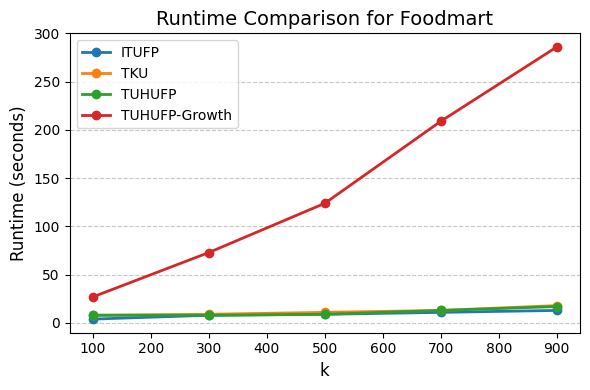

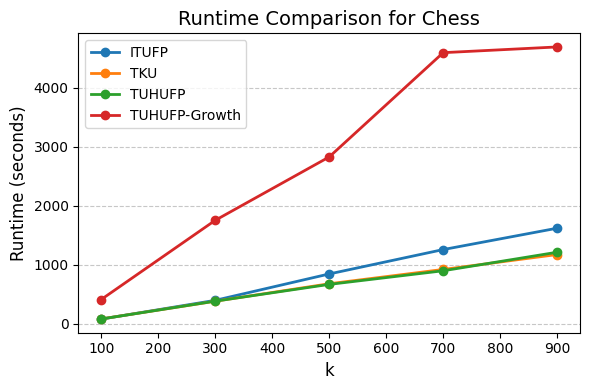

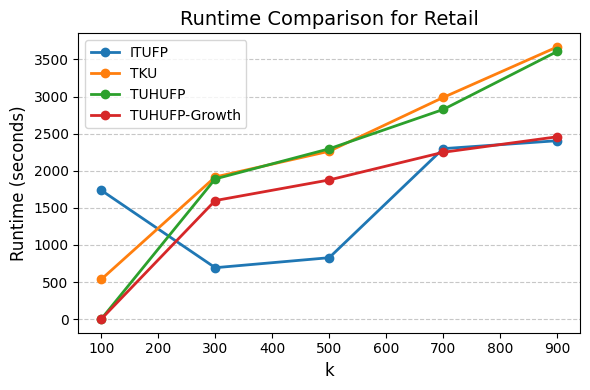

In [ ]:
drive.mount('/content/drive')
with open('/content/drive/MyDrive/DAA/Báo cáo CK/data/runtime.txt', 'r') as file:
    lines = file.readlines()

k_values = list(map(int, lines[0].strip().split()))

datasets = {"Foodmart": {}, "Chess": {}, "Retail": {}}
current_algorithm = None
dataset_order = ["Foodmart", "Chess", "Retail"]
index = 0

for line in lines[1:]:
    line = line.strip()
    if line.startswith("#"):
        current_algorithm = (
            line[2:].strip()
            .replace("UHUFP", "TUHUFP")
        )
        index = 0
    elif line:
        memory_values = list(map(float, line.split()))
        dataset_name = dataset_order[index]
        datasets[dataset_name].setdefault(current_algorithm, []).extend(memory_values)
        index += 1

for dataset_name, data in datasets.items():
    plt.figure(figsize=(6, 4))

    for algorithm, runtimes in data.items():
        plt.plot(k_values, runtimes, marker='o', label=algorithm, linewidth=2)

    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.title(f'Runtime Comparison for {dataset_name}', fontsize=14)
    plt.xlabel('k', fontsize=12)
    plt.ylabel('Runtime (seconds)', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

### **4.1.1 Nhận xét về Runtime**

**1. Bộ dữ liệu Foodmart:**

*  TUHUFP-Growth: Có thời gian thực thi tăng mạnh nhất khi giá trị k tăng. Đây là thuật toán có hiệu suất kém nhất so với các thuật toán còn lại.
*   TUHUFP: Thời gian thực thi ổn định và thấp nhất trong tất cả các thuật toán cho thấy hiệu suất vượt trội.
*   ITUFP và TKU: Có thời gian thực thi gần giống nhau, thấp hơn đáng kể so với TUHUFP-Growth, nhưng cao hơn một chút so với TUHUFP.

**2. Bộ dữ liệu Chess:**

*   TUHUFP-Growth: Thời gian thực thi tăng nhanh nhất và vượt xa các thuật toán còn lại, đặc biệt khi k lớn.
*   TUHUFP: Tiếp tục cho thấy hiệu suất tốt nhất với thời gian thực thi thấp nhất và ổn định ngay cả khi k tăng.
*   ITUFP: Thời gian thực thi tăng dần đều khi k tăng nhưng vẫn thấp hơn TUHUFP-Growth.
*   TKU: Duy trì thời gian thực thi ổn định, tương đương hoặc thấp hơn ITUFP và thấp hơn đáng kể so với TUHUFP-Growth.

**3. Bộ dữ liệu Retail**

*   TUHUFP là thuật toán hiệu quả nhất, với thời gian thực thi thấp và ổn định trên toàn bộ khoảng giá trị k.
*   TUHUFP-Growth hoạt động tốt khi k nhỏ, nhưng hiệu suất giảm dần khi k tăng.
*   ITUFP và TKU có thời gian thực thi không ổn định, đặc biệt là ITUFP khi k lớn.

***--> TUHUFP ổn định và hiệu suất nhất trong 3 bộ dữ liệu, TUHUFP - Growth thì chỉ hiệu quả khi k nhỏ. TKU thì ổn định nhưng khá chậm. ITUFP thì phù hợp với bộ dữ liệu nhỏ và ít phức tạp.***

## ***4.2 Bộ nhớ sử dụng***

Mounted at /content/drive


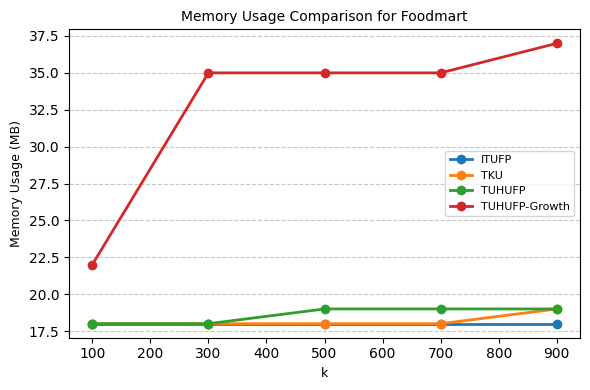

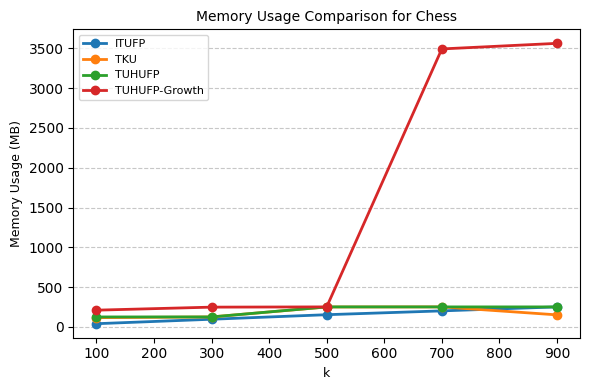

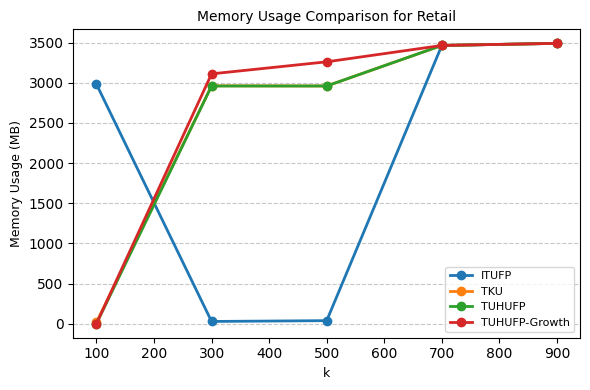

In [ ]:
drive.mount('/content/drive')
with open('/content/drive/MyDrive/DAA/Báo cáo CK/data/memory.txt', 'r') as file:
    lines = file.readlines()

k_values = list(map(int, lines[0].strip().split()))

datasets = {"Foodmart": {}, "Chess": {}, "Retail": {}}
current_algorithm = None
dataset_order = ["Foodmart", "Chess", "Retail"]
index = 0

for line in lines[1:]:
    line = line.strip()
    if line.startswith("#"):
        current_algorithm = (
            line[2:].strip()
            .replace("UHUFP", "TUHUFP")
        )
        index = 0
    elif line:
        memory_values = list(map(float, line.split()))
        dataset_name = dataset_order[index]
        datasets[dataset_name].setdefault(current_algorithm, []).extend(memory_values)
        index += 1

for dataset_name, data in datasets.items():
    plt.figure(figsize=(6, 4))

    for algorithm, memory_values in data.items():
        plt.plot(k_values, memory_values, marker='o', label=algorithm, linewidth=2)

    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.title(f'Memory Usage Comparison for {dataset_name}', fontsize=10)
    plt.xlabel('k', fontsize=9)
    plt.ylabel('Memory Usage (MB)', fontsize=9)
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()

### **4.2.1 Nhận xét về Memory Usage**

**1. Bộ dữ liệu Foodmart:**

*TUHUFP-Growth:*
*   Nhược điểm: Tiêu thụ bộ nhớ cao nhất trong tất cả các thuật toán. Đây là thuật toán tiêu tốn tài nguyên lớn nhất trên bộ dữ liệu này.
*   Nguyên nhân: Cấu trúc dữ liệu phức tạp đòi hỏi nhiều bộ nhớ hơn so với các thuật toán khác.

*TUHUFP, TKU, ITUFP:*
*   Ưu điểm: Tiêu thụ bộ nhớ ổn định và thấp bất kể giá trị k. Hiệu quả hơn về mặt sử dụng bộ nhớ so với TUHUFP-Growth.

***--> Trên bộ dữ liệu nhỏ và đơn giản như Foodmart, TUHUFP là lựa chọn tối ưu nhờ sử dụng ít bộ nhớ nhưng vẫn duy trì hiệu suất cao.***

**2. Bộ dữ liệu Chess:**

*TUHUFP-Growth:*

*   Nhược điểm: Tiêu thụ bộ nhớ tăng mạnh khi k ≥ 500 (từ 500 MB đến hơn 3500 MB). Điều này chứng tỏ thuật toán không phù hợp với dữ liệu phức tạp hoặc giá trị k lớn.

*TUHUFP, TKU, ITUFP:*

*   Ưu điểm: Ổn định, tiêu thụ ít bộ nhớ, bất kể giá trị k. Đây là lựa chọn phù hợp hơn cho các bộ dữ liệu phức tạp mà vẫn tiết kiệm tài nguyên.

***--> Trên dữ liệu phức tạp như Chess, TUHUFP vẫn vượt trội nhờ cân bằng hiệu suất và tài nguyên.***

**3. Bộ dữ liệu Retail:**

*ITUFP:*

*   Nhược điểm: Tiêu thụ bộ nhớ đột biến ở giá trị k nhỏ (2983 MB tại k = 100). Ở k ≥ 700, bộ nhớ tăng nhanh, kém hiệu quả khi xử lý giá trị k lớn.

*TKU:*

*   Ưu điểm: Tiêu thụ bộ nhớ thấp nhất ở k nhỏ (17 MB tại k = 100). Ổn định ở các giá trị k trung bình và lớn.
*   Nhược điểm: Tiêu thụ tài nguyên tăng mạnh ở k ≥ 300, gần bằng các thuật toán còn lại.

*TUHUFP:*

*   Ưu điểm: Không tiêu thụ bộ nhớ ở k nhỏ (k = 100). Ở các mức k trung bình và lớn, hiệu quả và ổn định ngang với TKU.
*   Nhược điểm: Không có sự vượt trội rõ ràng ở k lớn so với các thuật toán khác.

*TUHUFP-Growth:*

*   Ưu điểm: Không tiêu thụ bộ nhớ ở k nhỏ (k = 100), tương tự TUHUFP.
*   Nhược điểm: Khi k trung bình (300 ≤ k ≤ 500), tiêu thụ bộ nhớ cao hơn các thuật toán khác. Ở k lớn, tiêu thụ bộ nhớ ngang bằng nhưng không có sự vượt trội.

***Nhìn chung:***
*   Sử dụng TUHUFP hoặc TUHUFP cho các bài toán yêu cầu tối ưu hóa bộ nhớ, đặc biệt với k nhỏ hoặc trung bình.
*   Tránh sử dụng TUHUFP-Growth và ITUFP cho dữ liệu lớn hoặc giá trị k lớn khi hệ thống bị hạn chế tài nguyên.
*   TKU là lựa chọn thay thế tốt cho TUHUFP ở các bài toán với giá trị k trung bình đến lớn.

# **Tài liệu tham khảo**

1. https://www.sciencedirect.com/science/article/abs/pii/S0957417422021741


2. https://ieeexplore.ieee.org/abstract/document/8203736


3. https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=071ab17191fced0e66936329bc7a37a432dba1de


4. https://ijrar.com/upload_issue/ijrar_issue_20543672.pdf


5. https://www.researchgate.net/publication/221654358_Frequent_pattern_mining_with_uncertain_data


6. https://www.researchgate.net/publication/220894783_A_Tree-Based_Approach_for_Frequent_Pattern_Mining_from_Uncertain_Data


7. https://www.researchgate.net/publication/292208266_An_efficient_algorithm_for_mining_top-rank-k_frequent_patterns


8. https://www.sciencedirect.com/science/article/abs/pii/S0957417413006969


9. https://www.researchgate.net/publication/301551772_An_efficient_algorithm_for_mining_the_top-k_high_utility_itemsets_using_novel_threshold_raising_and_pruning_strategies


10. https://www.researchgate.net/publication/330490816_A_Survey_of_High_Utility_Itemset_Mining


11. https://www.researchgate.net/publication/3297459_Fast_Algorithms_for_Frequent_Itemset_Mining_Using_FP-Trees


12. https://www.researchgate.net/profile/Kenli-Li/publication/292208266_An_efficient_algorithm_for_mining_top-rank-k_frequent_patterns/links/5719bbdb08aed43f632358f8/An-efficient-algorithm-for-mining-top-rank-k-frequent-patterns.pdf


13. https://www.sciencedirect.com/science/article/abs/pii/S0957417414006848


14. https://www.researchgate.net/publication/322864109_Efficient_algorithms_for_mining_top-rank-_k_erasable_patterns_using_pruning_strategies_and_the_subsume_concept


15. https://ieeexplore.ieee.org/document/7912016/


16. https://www.sciencedirect.com/science/article/abs/pii/S0950705115003299


17. https://www.researchgate.net/publication/303601203_Efficient_Mining_of_Uncertain_Data_for_High-Utility_Itemsets


18. https://www.researchgate.net/publication/373916521_FTKHUIM_A_Fast_and_Efficient_Method_for_Mining_Top-K_High-Utility_Itemsets


19. https://ieeexplore.ieee.org/document/7425807


20. https://www.researchgate.net/publication/221653129_UP-Growth_An_efficient_algorithm_for_high_utility_itemset_mining
